# Detecting Hate Speech Using NLP on Twitter Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Project Overview

In today’s digital world, social media platforms have become essential arenas for public dialogue, particularly around politics. In Kenya, platforms like Twitter are not only used to share opinions and rally support but are also battlegrounds for targeted hate speech—especially toward political figures.

This project aims to develop a machine learning-based Natural Language Processing (NLP) system to detect hate speech in tweets directed at Kenyan politicians. By analyzing real tweets mentioning individuals such as the President,Deputy President, governors and many others, we seek to understand the patterns of online hate and create a model that classifies content as hate speech or not.

We will leverage standard NLP techniques—such as preprocessing, vectorization (TF-IDF or embeddings), and modeling using algorithms like Logistic Regression, Support Vector Machines, or transformer models like BERT. The project also incorporates exploratory data analysis (EDA) to uncover trends in hateful language, common keywords, and sentiment shifts.

***Imagine a Twitter-like platform where users can post freely. With this model in place, hate speech posts can be automatically flagged or hidden within seconds—drastically improving the experience for users and reducing platform liability.***


Ultimately, this work supports efforts in online safety, content moderation, and digital peacebuilding. The resulting model can assist social media teams, NGOs, and civic tech groups in identifying harmful political discourse in real time.

## Business Understanding
### Problem Statement
Kenyan politicians often face verbal attacks online, particularly during elections, political controversies, or ethnic debates. This hate speech can:

- Incite real-world violence

- Deepen ethnic divisions

- Harm reputations and mental well-being

- Undermine democratic participation

Manual moderation is slow and subjective, and harmful posts can go viral before they are taken down. An automated detection system is therefore critical for early intervention and risk mitigation.

### Project Goals
1. Detect hate speech in tweets directed at Kenyan political figures using supervised machine learning models.
2. Analyze trends in the language and frequency of political hate speech.
3. Provide insights and tools for moderation teams, researchers, and policy makers to take action against online toxicity.

### Key Stakeholders
1. Electoral bodies (IEBC, NCIC)

2. Civil rights NGOs (e.g., Amnesty Kenya, Ushahidi, Uchaguzi)

3. News media and fact-checking organizations

4. Government communication teams

5. Social media platforms (e.g., Twitter Kenya)

6. Academics and digital democracy researchers

### Metrics for Success

#### Model Evaluation Metrics
To evaluate our machine learning model’s effectiveness, we will track:

- Accuracy – How often the model predicts correctly

- Precision (Hate class) – % of flagged hate tweets that were actually hateful

- Recall (Hate class) – % of true hate tweets the model managed to detect

- F1 Score – A balance between precision and recall

- Confusion Matrix – A detailed view of false positives and false negatives

#### Business Impact Metrics
In addition to technical accuracy, we will evaluate the solution based on its real-world impact:

- Moderation efficiency – Reduction in time required for human review

- Detection speed – Time taken to flag hate speech from the moment it's posted

- Coverage fairness – Model performance across tweets targeting different politicians

- Explainability – Ability to justify flagged posts using explainable AI tools like SHAP or LIME


## Project Objectives
1. Build an NLP model to detect hate speech in tweets targeting Kenyan politicians.

2. Analyze linguistic patterns and trends in political hate speech.

3. Compare hate speech dynamics across different politicians.

4. Evaluate model performance using metrics like accuracy, precision, recall, and F1-score.

5. Provide insights to support content moderation and civic monitoring.

6. Establish a foundation for real-time or multilingual hate speech detection systems.

# Data Understanding
The dataset was collected from the Twitter (now X) platform through web scraping techniques, specifically using Tweepy and Twint's TwSearchExporter. The data focuses on tweets that reference prominent and vocal political figures in Kenya, including President William Ruto, Former Deputy President Rigathi Gachagua, Deputy President Kithure Kindiki, among others. The goal was to gather public sentiment and discourse surrounding these figures, particularly in the context of hate speech and offensive language.

The dataset comprises a total of 11,317 records with 6 columns, each representing distinct attributes related to the tweets. These include the tweet content, metadata (such as timestamps), and other contextual information useful for natural language processing tasks.

This dataset serves as the foundation for a hate speech classification project aimed at categorizing tweets into three classes: hate, offensive, and neutral.

The dataset comprises of the columns:

1. **Tweet ID**: A unique identifier assigned to each tweet. Useful for traceability and cross-referencing with Twitter's platform.
2. **Likes**: The number of likes a tweet received, indicating its popularity or approval from users.
3. **Retweets**: The number of times the tweet was retweeted, showing its spread across the platform.
4. **Total Replies**: The number of direct replies the tweet generated, reflecting user engagement and potential controversy.
5. **Texts**: The full textual content of the tweet. This is the primary feature used for natural language processing and classification tasks.
6. **Created At**: The timestamp of when the tweet was published, allowing for temporal analysis or filtering based on time periods.

## Exploring the dataset
Here our aim is to explore the data by asserting the columns and rows distribution, statistical distribution for the columns, and exploring the data types for each column

In [ ]:
#importing all the required libraries
#!pip uninstall torch -y
!pip install torch

!pip install transformers datasets scikit-learn
!pip install spacy
!pip install rapidfuzz

# Data manipulation and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Feature Engineering and visualizations
import re
import calendar
from dateutil import easter
import spacy
from rapidfuzz import process, fuzz
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

#Text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

#Modeling and evaluation
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset as HFDataset
from sklearn.metrics import accuracy_score, f1_score,classification_report,confusion_matrix

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [ ]:
#Loading the dataset
data = pd.read_csv('Kenyan_politicians_hatespeech.csv')

data.head()

Tweet ID  Likes  Retweets  Total Replies  \
0  1.912286e+18    2.0       0.0            1.0   
1  1.912285e+18    0.0       0.0            0.0   
2  1.912278e+18    0.0       0.0            0.0   
3  1.912275e+18    0.0       0.0            0.0   
4  1.912272e+18    0.0       0.0            0.0   

                                               Texts  \
0  Rigathi Gachagua ni snitches Ile ya ukweli. La...   
1  @NoCountryHere it’s different for Gachagua man...   
2  @gitaus794 @Mithika_Denno @bonifacemwangi Wher...   
3  @hermexinvesting @MwangiHub The common enemy o...   
4  SHOCK as Gachagua addresses MILLIONS of Mlolon...   

                      Created At  
0  2025-04-15 23:23:00+00:00      
1  2025-04-15 23:21:43+00:00      
2  2025-04-15 22:52:56+00:00      
3  2025-04-15 22:40:45+00:00      
4  2025-04-15 22:30:19+00:00

In [ ]:
#Asserting the shape of the dataset
data.shape

(11317, 6)

In [ ]:
#Checking column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11317 entries, 0 to 11316
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tweet ID       11317 non-null  float64
 1   Likes          11317 non-null  float64
 2   Retweets       11317 non-null  float64
 3   Total Replies  11317 non-null  float64
 4   Texts          11317 non-null  object 
 5   Created At     11317 non-null  object 
dtypes: float64(4), object(2)
memory usage: 530.6+ KB


In [ ]:
#Checking statistical information for numeric columns
data.describe().T

count          mean           std           min  \
Tweet ID       11317.0  1.827889e+18  1.624154e+17  1.262900e+17   
Likes          11317.0  9.191644e+02  1.448601e+04  0.000000e+00   
Retweets       11317.0  1.956497e+02  2.283746e+03  0.000000e+00   
Total Replies  11317.0  6.696625e+01  1.080506e+03  0.000000e+00   

                        25%           50%           75%           max  
Tweet ID       1.815727e+18  1.891572e+18  1.912258e+18  1.914318e+18  
Likes          1.000000e+00  1.300000e+01  3.020000e+02  1.060202e+06  
Retweets       0.000000e+00  4.000000e+00  5.300000e+01  1.504460e+05  
Total Replies  0.000000e+00  1.000000e+00  1.900000e+01  8.787900e+04

In [ ]:
#Checking statistical informatio for categorical columns
data.describe(include = 'O').T

count unique                        top freq
Texts       11317  11241    @BernardKavuli Matiangi    5
Created At  11317  11228  2025-04-03 11:25:57+00:00    3

In [ ]:
#Checking if the data has missing values
data.isnull().sum()

Tweet ID         0
Likes            0
Retweets         0
Total Replies    0
Texts            0
Created At       0
dtype: int64

In [ ]:
#Checking for duplicates
data.duplicated().sum()

0

# Data Cleaning

In [ ]:
#Saving a new copy to keep contents of the initial dataset
df = data.copy(deep=True)

In [ ]:
#Confirm the saved copy
df.head()

Tweet ID  Likes  Retweets  Total Replies  \
0  1.912286e+18    2.0       0.0            1.0   
1  1.912285e+18    0.0       0.0            0.0   
2  1.912278e+18    0.0       0.0            0.0   
3  1.912275e+18    0.0       0.0            0.0   
4  1.912272e+18    0.0       0.0            0.0   

                                               Texts  \
0  Rigathi Gachagua ni snitches Ile ya ukweli. La...   
1  @NoCountryHere it’s different for Gachagua man...   
2  @gitaus794 @Mithika_Denno @bonifacemwangi Wher...   
3  @hermexinvesting @MwangiHub The common enemy o...   
4  SHOCK as Gachagua addresses MILLIONS of Mlolon...   

                      Created At  
0  2025-04-15 23:23:00+00:00      
1  2025-04-15 23:21:43+00:00      
2  2025-04-15 22:52:56+00:00      
3  2025-04-15 22:40:45+00:00      
4  2025-04-15 22:30:19+00:00

In [ ]:
# Dropping unwanted column
df = df.drop(columns=['Tweet ID'])

In [ ]:
#Confirming the changes
df_columns = df.columns
print(df_columns)

Index(['Likes', 'Retweets', 'Total Replies', 'Texts', 'Created At'], dtype='object')


In [ ]:
# Convert to numeric columns to integers
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce')
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce')
df['Total Replies'] = pd.to_numeric(df['Total Replies'], errors='coerce')

# Convert date column
df['Created At'] = pd.to_datetime(df['Created At'], errors='coerce')

In [ ]:
# Clean text column
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # normalize whitespace
    return text

df['Cleaned_Text'] = df['Texts'].apply(clean_text)

In [ ]:
#Confirming cleaned text has been added
df.head()

Likes  Retweets  Total Replies  \
0    2.0       0.0            1.0   
1    0.0       0.0            0.0   
2    0.0       0.0            0.0   
3    0.0       0.0            0.0   
4    0.0       0.0            0.0   

                                               Texts  \
0  Rigathi Gachagua ni snitches Ile ya ukweli. La...   
1  @NoCountryHere it’s different for Gachagua man...   
2  @gitaus794 @Mithika_Denno @bonifacemwangi Wher...   
3  @hermexinvesting @MwangiHub The common enemy o...   
4  SHOCK as Gachagua addresses MILLIONS of Mlolon...   

                 Created At                                       Cleaned_Text  
0 2025-04-15 23:23:00+00:00  rigathi gachagua ni snitches ile ya ukweli laz...  
1 2025-04-15 23:21:43+00:00  its different for gachagua man dont underestim...  
2 2025-04-15 22:52:56+00:00         wheres gachagua with his political leprosy  
3 2025-04-15 22:40:45+00:00  the common enemy outside mt kenya is gachagua ...  
4 2025-04-15 22:30:19+00:00  shock as gachagua addresses millions of mlolon...

In [ ]:
 #Insert the new column(Label) after 'cleaned_text'
col_index = df.columns.get_loc('Cleaned_Text') + 1  # position after 'cleaned_text'
df.insert(loc=col_index, column='Label', value= '')  # or value='pending' or ''

In [ ]:
# Convert to categorical columns
df['Cleaned_Text'] = df['Cleaned_Text'].astype('category')
df['Label'] = df['Label'].astype('category')

In [ ]:
 #Convert to categorical columns
df['Cleaned_Text'] = df['Cleaned_Text'].astype('category')
df['Label'] = df['Label'].astype('category')

In [ ]:
# Cleaning column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
#Dropping the original text column
df = df.drop(columns=['texts'])
df.columns

Index(['likes', 'retweets', 'total_replies', 'created_at', 'cleaned_text',
       'label'],
      dtype='object')

In [ ]:
#Saving the cleaned text for labeling
df.to_csv('kenyan_politics_cleaned_text.csv', index=False)

## Labeling of the texts

#### Labeling Strategy

Given the linguistic characteristics of our dataset, we opted for a manual labeling approach. A significant portion of the tweets are written in Sheng, a hybrid sociolect that blends English and Swahili, and is widely spoken in urban areas of Kenya. Sheng is highly dynamic, context-dependent, and culturally nuanced—posing unique challenges for automated natural language processing tools, especially pre-trained models which lack exposure to this evolving vernacular.

At present, there are no existing models or datasets that can effectively interpret and label Sheng text with high accuracy. Most multilingual language models fail to grasp the contextual depth, code-switching patterns, and slang prevalent in this language. As native speakers and individuals well-acquainted with the social and political landscape of Kenya, we leveraged our linguistic and cultural understanding to perform manual annotation of the tweets.

Each tweet was carefully reviewed and labeled into one of three categories:

1. Hate – content expressing hateful, discriminatory, or inciting language.

2. Neutral – content that is informative, benign, it is neither hateful nor offensive.

This manual process ensures high-quality annotations that are contextually accurate and culturally relevant, forming a reliable foundation for training an effective hate speech classification model.

Our approach was to save the cleaned dataset inform of csv and label  manually from Excel.

In [ ]:
#Loading the labeled dataset
df1 = pd.read_csv('labeled_kenyan_hatespeech.csv')

In [ ]:
# Apply .lower() to every string cell in the DataFrame
df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [ ]:
# Sample DataFrame
df1['label'] = df1['label'].replace({'offensive': 'hate'})

df1['label'].unique()


array(['neutral', 'hate'], dtype=object)

In [ ]:
df1.to_csv('updated_labeled_kenyan_hatespeech.csv')

We can further explore the labeled data for any abnormalities

In [ ]:
df1.head()

unnamed:_0  likes  retweets  total_replies                 created_at  \
0         0.0     39         2              0  2024-07-30 10:27:22+00:00   
1         1.0      0         0              0  2024-07-31 07:12:21+00:00   
2         2.0      5         5              0  2024-07-20 10:43:30+00:00   
3         3.0    593       248            114  2024-07-12 18:31:05+00:00   
4         4.0      6         4              0  2024-09-29 21:45:26+00:00   

                                        cleaned_text    label  
0  former ig japheth koome should be taken to icc...  neutral  
1  my views japheth koome should be charged prose...  neutral  
2  at this rate we might as well have ig japheth ...  neutral  
3  kenyas police chief japhet koome has resigned ...  neutral  
4  japheth koomes resignation has resulted in the...  neutral

In [ ]:
df1.shape

(10971, 7)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10971 entries, 0 to 10970
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unnamed:_0     2251 non-null   float64
 1   likes          10971 non-null  int64  
 2   retweets       10971 non-null  int64  
 3   total_replies  10971 non-null  int64  
 4   created_at     10971 non-null  object 
 5   cleaned_text   10959 non-null  object 
 6   label          10971 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 600.1+ KB


In [ ]:
#Checking the null values
df1.isnull().sum()

unnamed:_0       8720
likes               0
retweets            0
total_replies       0
created_at          0
cleaned_text       12
label               0
dtype: int64

In [ ]:
df1.drop(columns=['unnamed:_0'],inplace=True,axis=1)

In [ ]:
#Checking the duplicates
df1.duplicated().sum()

1538

In [ ]:
#Dropping the null values
df1.dropna(subset=['cleaned_text'], inplace=True)


In [ ]:
#Dropping the duplicates
df1.drop_duplicates(inplace=True)

In [ ]:
#Confirming changes
df1.isnull().sum().any()

False

In [ ]:
#Confirming elimination of all the duplicates
df1.duplicated().sum()

0

In [ ]:
#Confirming the changes
df1['label'].value_counts()

label
neutral    5839
hate       3582
Name: count, dtype: int64

In [ ]:
#Loading the final shape of the dataset
df1.shape

(9421, 6)

# Feature Engineering
Feature engineering is a critical step in preparing the dataset for analysis and modeling. It involves creating new features that better represent the underlying patterns in the data. Below are the engineered features and the reasoning behind their inclusion:

### Columns Used for Feature Engineering

- **likes**, **retweets**, **total_replies**
  - These three metrics reflect user engagement with a tweet. Individually, they are important, but combined, they can offer a more comprehensive view.

- **cleaned_text**
  - The cleaned tweet content is used to extract linguistic features like length, word count, hashtags, and mentions, which help understand the structure and purpose of a tweet.

- **created_at**
  - This datetime field is used to derive time-based patterns, such as when a politician is trending or how tweet activity varies by season, hour, or weekday.

---

### New Features Created

- **engagement_score** = likes + retweets + total_replies  
  → A unified metric to measure tweet popularity or user response.

- **tweet_length**  
  → Total number of characters in a tweet. Longer tweets may carry more detail or stronger sentiment.

- **word_count**  
  → Number of words in a tweet. Helps analyze verbosity or messaging style.

- **hour**, **day**, **month**, **year**, **day_of_week**, **season**


→ Helps analyze temporal trends in tweet activity and engagement, including political events or public sentiment surges.


---

These engineered features help improve the interpretability of the dataset and enhance the performance.


In [ ]:
df1.sample(50)

likes  retweets  total_replies                     created_at  \
8036       0         0              0      2025-04-17 00:05:31+00:00   
5660      12         1              1      2025-04-14 11:10:52+00:00   
2969       0         0              0     2025-04-15 15:32:10+00:00    
7983       3         2              0      2024-07-27 08:54:46+00:00   
9655     770        87             42      2022-10-01 00:09:30+00:00   
4158    2583       605            121      2025-04-08 17:11:46+00:00   
6454       2         2              0      2024-05-14 17:55:44+00:00   
893        0         0              0      2025-04-18 12:11:01+00:00   
4762      14         8              0      2024-07-14 18:24:16+00:00   
2072       0         0              0      2025-04-21 07:49:55+00:00   
9983       0         0              0    2025-04-17 19:19:23+00:00     
4181     786       119             52      2021-02-17 09:31:51+00:00   
539        0         0              0      2025-04-13 20:40:10+00:00   
2956       0         0              0     2025-04-15 15:36:08+00:00    
4682      16         7              5      2024-07-28 10:25:29+00:00   
464        0         0              0      2025-04-17 09:20:00+00:00   
4726     798       378             19      2024-03-22 09:12:39+00:00   
9697      21        13              1      2025-04-02 13:20:31+00:00   
3948     152        11              5      2025-04-14 15:41:54+00:00   
3118       0         0              0     2025-04-16 21:12:38+00:00    
4277    2097       739            168      2024-08-25 14:13:21+00:00   
9222     203        38             20      2023-07-18 03:22:30+00:00   
7619       1         1              1      2024-12-27 13:54:21+00:00   
9715       0         0              1      2025-04-17 06:09:37+00:00   
5381       0         0              0      2024-12-24 23:12:58+00:00   
3171       0         0              0     2025-04-17 17:16:16+00:00    
2178       0         0              0      2025-04-18 21:31:17+00:00   
10827     60        18              5      2024-12-30 19:06:39+00:00   
563        0         0              0      2025-04-11 19:33:57+00:00   
1042    1770      1250             63      2025-03-22 10:29:57+00:00   
10035   1720       814             65      2024-10-26 19:10:34+00:00   
2474       2         0              0   2025-04-16 08:30:20+00:00      
2752       0         0              0     2025-04-15 08:57:03+00:00    
5063   70470      9322            845      2025-04-20 14:10:00+00:00   
10571     53        22              9      2025-04-15 15:09:04+00:00   
6113     204       120              2      2024-06-20 15:35:23+00:00   
2562       0         0              0    2025-04-15 17:55:21+00:00     
4256     222       118             20      2018-07-03 21:47:52+00:00   
9402      18         3              2      2025-03-20 17:55:28+00:00   
5169    4265      2466             92      2024-10-08 09:03:25+00:00   
3213       0         0              0     2025-04-17 16:14:29+00:00    
2312       0         0              0  2025-04-15 20:08:26+00:00       
1731      43        21              0      2024-12-28 17:34:52+00:00   
4464       9         1              0      2024-07-30 14:12:23+00:00   
9656     329        45             11      2021-07-15 21:32:12+00:00   
424        1         0              0      2022-10-24 18:53:43+00:00   
3549    2676       326            771      2024-10-01 00:38:45+00:00   
785       12         0              1      2025-04-16 17:20:55+00:00   
9141       0         0              0   2025-04-15 19:29:26+00:00      
5894      21         1              4      2025-04-21 13:43:11+00:00   

                                            cleaned_text    label  
8036   ichungwas downfall will be one for the books h...  neutral  
5660   mumewahi sikia mahali nikisema nimeenda shule ...     hate  
2969                                    banaruto must go  neutral  
7983   i wonder why kimuzi and aoko are fighting boni...  neut

### 1. Engagement Score (likes, retweets, and replies)

In [ ]:
# Calculate combined engagement
df1['engagement_score'] = df1['likes'] + df1['retweets'] + df1['total_replies']

### 2. Tweet Length (number of characters)

In [ ]:
df1['text_length'] = df1['cleaned_text'].apply(len)
df1['text_length'].head(5)

0     74
1    120
2    104
3    246
4    273
Name: text_length, dtype: int64

### 3. Engagement bins for likes, retweets, replies and the total engagement

In [ ]:
# Binning individual engagement types
df1['likes_bin'] = pd.cut(df1['likes'], bins=[-1, 0, 10, 100, 1000, 10000,100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k','10k+'])
df1['retweets_bin'] = pd.cut(df1['retweets'], bins=[-1, 0, 10, 100, 1000, 10000, 100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k','10k+'])
df1['replies_bin'] = pd.cut(df1['total_replies'], bins=[-1, 0, 10, 100, 1000, 10000, 100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k','10k+'])
df1['engagement_bin'] = pd.cut(df1['engagement_score'], bins=[-1, 0, 10, 100, 1000, 10000, 100000], labels=['0', '1-10', '11-100', '101-1k', '1001-10k', '10k+'])

### 4. Add a wordcount and text length column

In [ ]:
 #Add word count column
df1['word_count'] = df1['cleaned_text'].apply(lambda x: len(str(x).split()))



### 5. Extract Named Entities of Type PERSON (e.g., politicians)

In [ ]:
# Load spacy's small model
nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    # Extract entities of type 'PERSON' and return as a comma-separated string
    entities = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    return ', '.join(entities)  # Join the list into a single string

# Apply the function to your DataFrame
df1['entities'] = df1['cleaned_text'].apply(extract_entities)

### 6. Extract Time Features

In [ ]:
# Extract parts of the datetime
# Convert the column to datetime
df1['created_at'] = pd.to_datetime(df1['created_at'], errors='coerce')
df1['year'] = df1['created_at'].dt.year
df1['month'] = df1['created_at'].dt.month
df1['day'] = df1['created_at'].dt.day
df1['day_of_week'] = df1['created_at'].dt.day_name()
df1['hour'] = df1['created_at'].dt.hour

#### 6.1. Define Fixed Holidays

In [ ]:
def add_named_holidays(df1):
    fixed_holidays = {
        '01-01': "New Year's Day",
        '05-01': "Labour Day",
        '06-01': "Madaraka Day",
        '10-20': "Mashujaa Day",
        '12-12': "Jamhuri Day",
        '12-25': "Christmas Day",
        '12-26': "Boxing Day"
    }

    eid_dates = {
        2020: {'Eid al-Fitr': '05-23', 'Eid al-Adha': '07-31'},
        2021: {'Eid al-Fitr': '05-13', 'Eid al-Adha': '07-19'},
        2022: {'Eid al-Fitr': '05-02', 'Eid al-Adha': '07-08'},
        2023: {'Eid al-Fitr': '04-21', 'Eid al-Adha': '06-29'},
        2024: {'Eid al-Fitr': '04-10', 'Eid al-Adha': '06-16'},
        2025: {'Eid al-Fitr': '03-31', 'Eid al-Adha': '06-07'},
    }

    df1['holiday_name'] = None

    for idx, row in df1.iterrows():
        if pd.isna(row['year']) or pd.isna(row['created_at']):
            continue  # Skip rows without date/year

        month_day = row['created_at'].strftime('%m-%d')
        year = int(row['year'])

        # Fixed holidays
        if month_day in fixed_holidays:
            df1.at[idx, 'holiday_name'] = fixed_holidays[month_day]

        # Easter-based holidays
        try:
            easter_day = easter.easter(year)
            if month_day == (easter_day - pd.Timedelta(days=2)).strftime('%m-%d'):
                df1.at[idx, 'holiday_name'] = "Good Friday"
            elif month_day == (easter_day + pd.Timedelta(days=1)).strftime('%m-%d'):
                df1.at[idx, 'holiday_name'] = "Easter Monday"
        except Exception as e:
            pass

        # Eid holidays
        if year in eid_dates:
            for name, eid_md in eid_dates[year].items():
                if month_day == eid_md:
                    df1.at[idx, 'holiday_name'] = name

    return df1

In [ ]:
df1 = add_named_holidays(df1)
df1['holiday_name'].value_counts()

holiday_name
Easter Monday     438
Good Friday       259
Christmas Day      61
Boxing Day         59
Eid al-Fitr        23
Mashujaa Day        9
Labour Day          9
Madaraka Day        8
Jamhuri Day         7
New Year's Day      6
Eid al-Adha         6
Name: count, dtype: int64

In [ ]:
# Prepare and clean entity strings
entities_series = df1['entities'].fillna('').astype(str).str.lower().str.split(',')
all_entities = [name.strip() for sublist in entities_series for name in sublist if name.strip()]

# Build a frequency counter to prioritize common names
from collections import Counter
entity_counts = Counter(all_entities)

# Get unique names
unique_entities = list(entity_counts.keys())

# Map similar names to a representative (canonical) name
canonical_map = {}
used = set()

for name in unique_entities:
    if name in used:
        continue
    matches = process.extract(
        name, unique_entities, scorer=fuzz.token_sort_ratio, limit=None
    )
    # Group names with similarity > 90
    similar_names = [match for match, score, _ in matches if score > 90]
    for sim in similar_names:
        canonical_map[sim] = name
        used.add(sim)

# Apply mapping to original DataFrame
def standardize_entities(entity_str):
    if pd.isna(entity_str) or not entity_str.strip():
        return ''
    names = [name.strip().lower() for name in entity_str.split(',')]
    std_names = [canonical_map.get(name, name) for name in names]
    return ', '.join(sorted(set(std_names)))  # deduplicate within tweet

df1['entities_standardized'] = df1['entities'].apply(standardize_entities)

### 5. Outlier detection

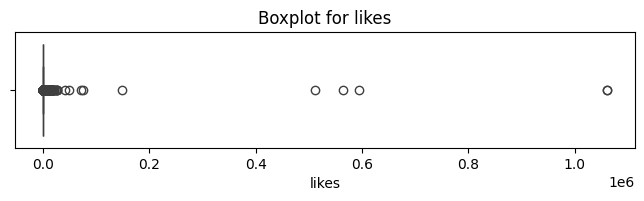

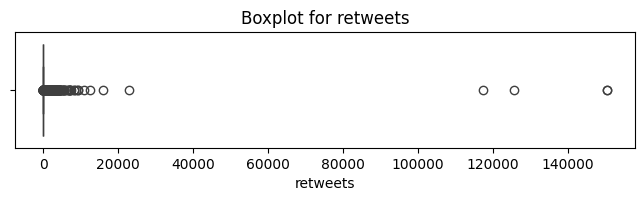

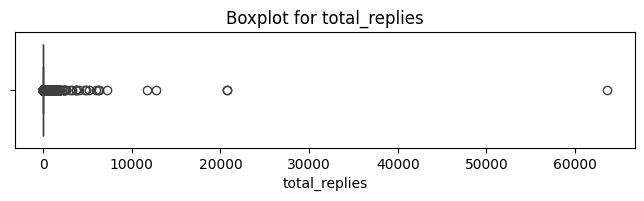

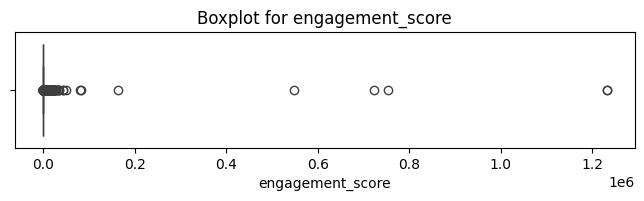

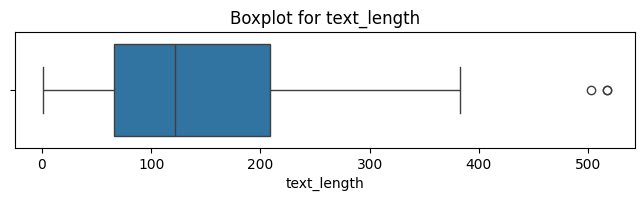

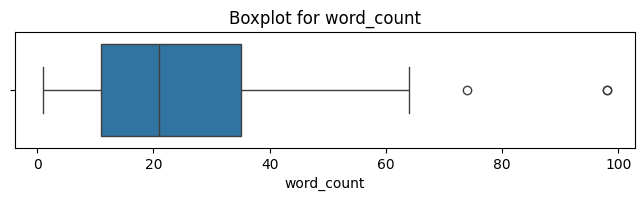

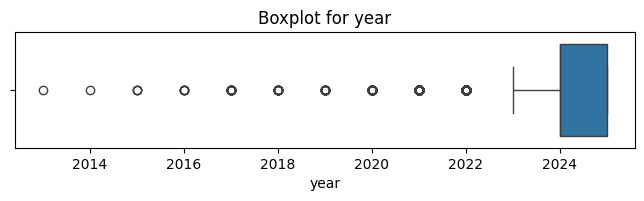

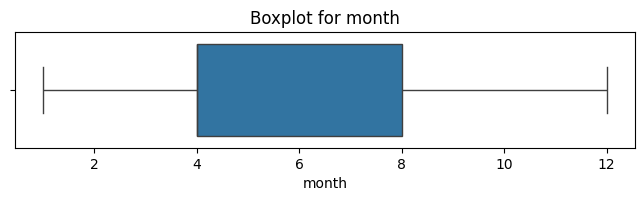

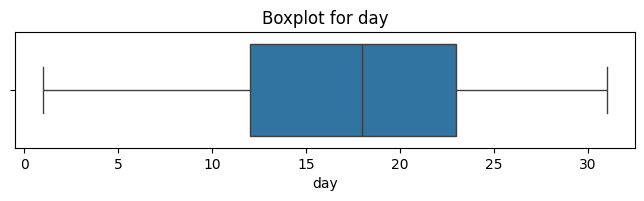

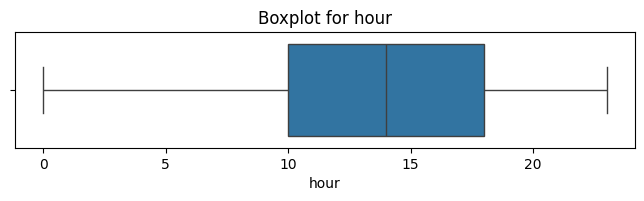

In [ ]:
# Select only numeric columns
numeric_cols = ['likes', 'retweets', 'total_replies', 'engagement_score',
                'text_length', 'word_count', 'year', 'month', 'day', 'hour']

for col in numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df1[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

**Observations**

- The data is spread out: The whiskers extend from around 1 to 12, indicating that the data points range across almost the entire possible spectrum for the "month" variable (presumably months of the year).

- The interquartile range (IQR) is between approximately 4 and 8: The box itself spans from roughly 4 to 8 on the x-axis. This means that the middle 50% of the data falls within this range.

- The median is around 6: The line inside the box, representing the median, appears to be close to the value of 6. This suggests that half of the data points are below 6 and half are above.

- The distribution appears somewhat symmetrical: The median is relatively centered within the box, and the whiskers are of roughly similar lengths. This hints that the distribution of the data might not be heavily skewed in either direction.
There are no apparent outliers: There are no individual data points plotted outside the whiskers, which suggests that there aren't any extreme values in this dataset for the "month" variable.

However since these numerical features are crucial for our analysis we have decided not to eliminate the outliers.

In [ ]:
df1.head()

likes  retweets  total_replies                created_at  \
0     39         2              0 2024-07-30 10:27:22+00:00   
1      0         0              0 2024-07-31 07:12:21+00:00   
2      5         5              0 2024-07-20 10:43:30+00:00   
3    593       248            114 2024-07-12 18:31:05+00:00   
4      6         4              0 2024-09-29 21:45:26+00:00   

                                        cleaned_text    label  \
0  former ig japheth koome should be taken to icc...  neutral   
1  my views japheth koome should be charged prose...  neutral   
2  at this rate we might as well have ig japheth ...  neutral   
3  kenyas police chief japhet koome has resigned ...  neutral   
4  japheth koomes resignation has resulted in the...  neutral   

   engagement_score  text_length likes_bin retweets_bin  ... engagement_bin  \
0                41           74    11-100         1-10  ...         11-100   
1                 0          120         0            0  ...              0   
2                10          104      1-10         1-10  ...           1-10   
3               955          246    101-1k       101-1k  ...         101-1k   
4                10          273      1-10         1-10  ...           1-10   

  word_count        entities    year  month   day  day_of_week  hour  \
0         13   japheth koome  2024.0    7.0  30.0      Tuesday  10.0   
1         18          maduro  2024.0    7.0  31.0    Wednesday   7.0   
2         19   japheth koome  2024.0    7.0  20.0     Saturday  10.0   
3         37    japhet koome  2024.0    7.0  12.0       Friday  18.0   
4         43  japheth koomes  2024.0    9.0  29.0       Sunday  21.0   

   holiday_name entities_standardized  
0          None         japheth koome  
1          None                maduro  
2          None         japheth koome  
3          None         japheth koome  
4          None         japheth koome  

[5 rows x 21 columns]

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Univariate Analysis For Numeric Data

#### Social Media Metrics Distribution

In [ ]:
#Box plot
fig = px.box(df1, y=['likes', 'retweets', 'total_replies'],
             title="Distribution of Social Media Metrics")
fig.show()

**Observations**

- Likes Dominate: It's immediately clear that the number of likes tends to be significantly higher than both retweets and total replies. The box plot for 'likes' is positioned much higher on the value scale.

- Low Engagement for Replies: The 'total_replies' metric shows the lowest values overall. The box plot is clustered very close to zero, suggesting that the posts in this dataset generally receive a very small number of direct replies.

- Retweets in the Middle: The distribution of 'retweets' falls somewhere in between likes and total replies. While not as high as likes, there are noticeably more retweets than direct replies.


#### Text length distribution

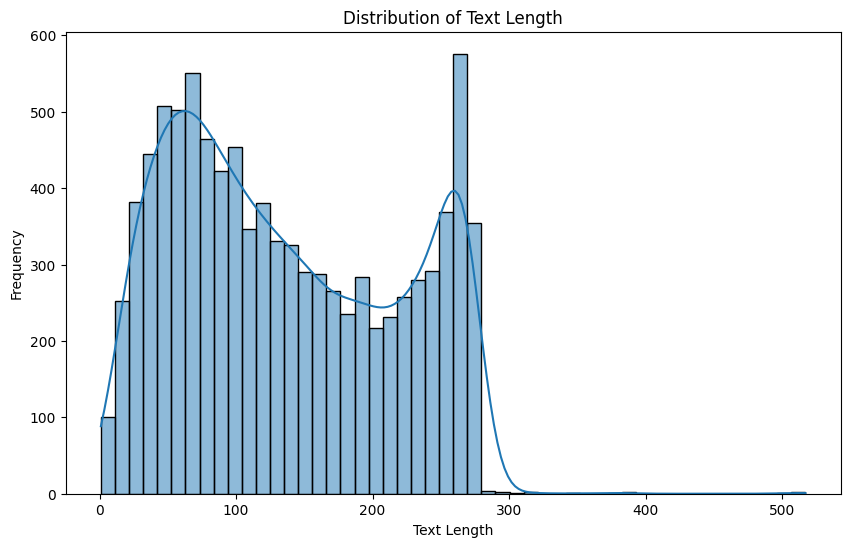

In [ ]:
# Overall text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df1['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


**Observations**

The distribution of text length is right-skewed, with the highest concentration of texts between 10 and 15 words, and additional smaller peaks around 25 and 40 words, indicating the presence of multiple text types.

#### Distribution of Engagement Score

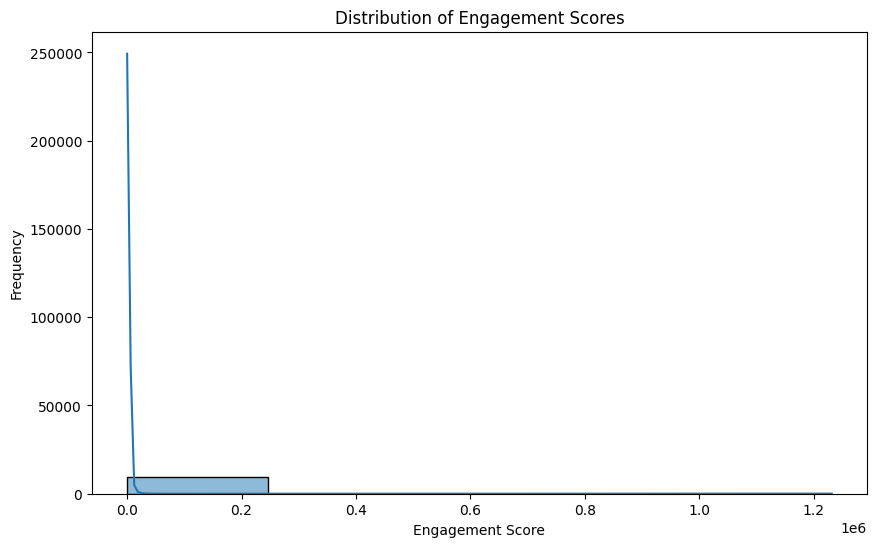

In [ ]:
# Engagement score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df1['engagement_score'], bins=5, kde=True)
plt.title('Distribution of Engagement Scores')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()


**Observations**

- Highly Skewed Distribution: The distribution is heavily skewed to the right. Most of the engagement scores are concentrated at the lower end of the scale (below 0.25 million), with a long tail extending towards much higher values.

- Low Frequency of High Engagement: The curve indicates that very high engagement scores are quite rare. The frequency drops off dramatically as the engagement score increases.



#### Distribution of Sentiment Score

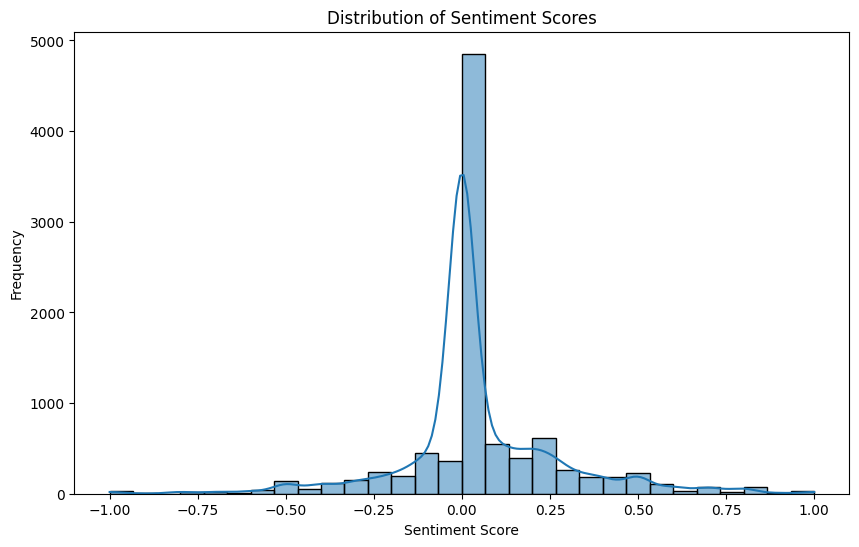

In [ ]:
from textblob import TextBlob

# Function to get sentiment score
def get_sentiment(text):
  analysis = TextBlob(text)
  return analysis.sentiment.polarity

# Apply the function to your text data
df1['sentiment_score'] = df1['cleaned_text'].apply(get_sentiment)

# Sentiment classification
def classify_sentiment(score):
  if score > 0:
    return 'Positive'
  elif score < 0:
    return 'Negative'
  else:
    return 'Neutral'

df1['sentiment_label'] = df1['sentiment_score'].apply(classify_sentiment)

# Ploting Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df1['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

**Observations**
- The sentiment scores are symmetrically distributed around 0, indicating a balance between positive and negative sentiments.
- Most scores cluster near zero, suggesting neutral or mildly positive/negative sentiments dominate, while extreme scores (close to -1 or 1) are less frequent.
- The distribution peaks at 0.00, highlighting a prevalence of neutral sentiment.


### Univariate Analysis For Categorical Data

#### Distribution of Labels

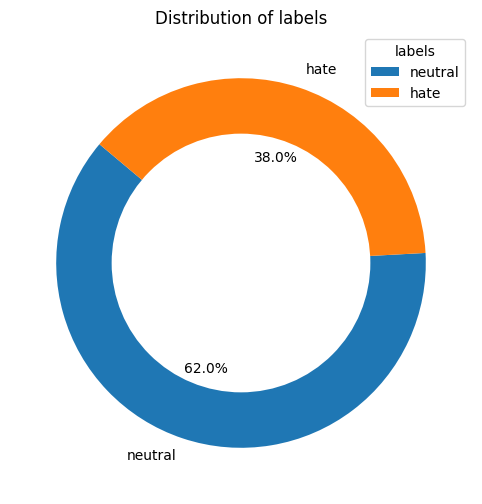

In [ ]:
# count of the labels
label_count = df1['label'].value_counts()

# create a piplot to show thw distribution
plt.figure(figsize=(8,6))
plt.pie(label_count, labels=label_count.index, autopct='%1.1f%%', startangle=140)

# create a blank circle at the centre
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# customize the plot
plt.title("Distribution of labels")
plt.legend(title="labels", loc="upper right")
plt.show()

**Observations**

- The  chart visually depicts a significant class imbalance in the dataset.

- The "neutral" class has the highest percentage of 62.0%, and "hate" 38.0%  .

#### Word Count/ Frequency Analysis

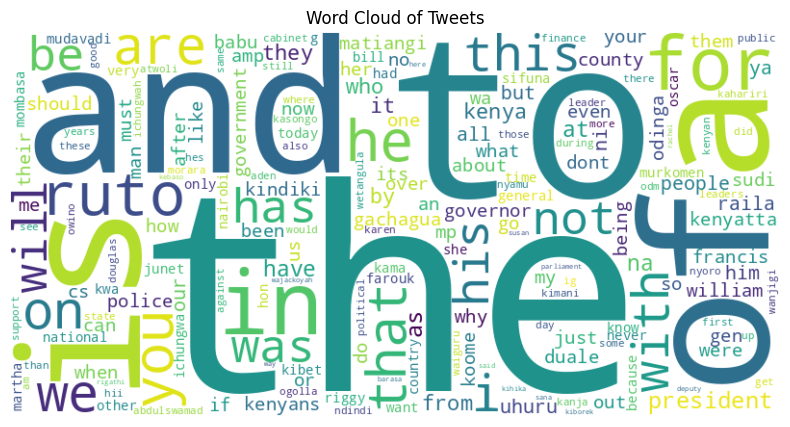

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Tokenizing the text and count word frequencies
word_counts = Counter(" ".join(df['cleaned_text']).split())

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plotting word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Tweets")
plt.show()

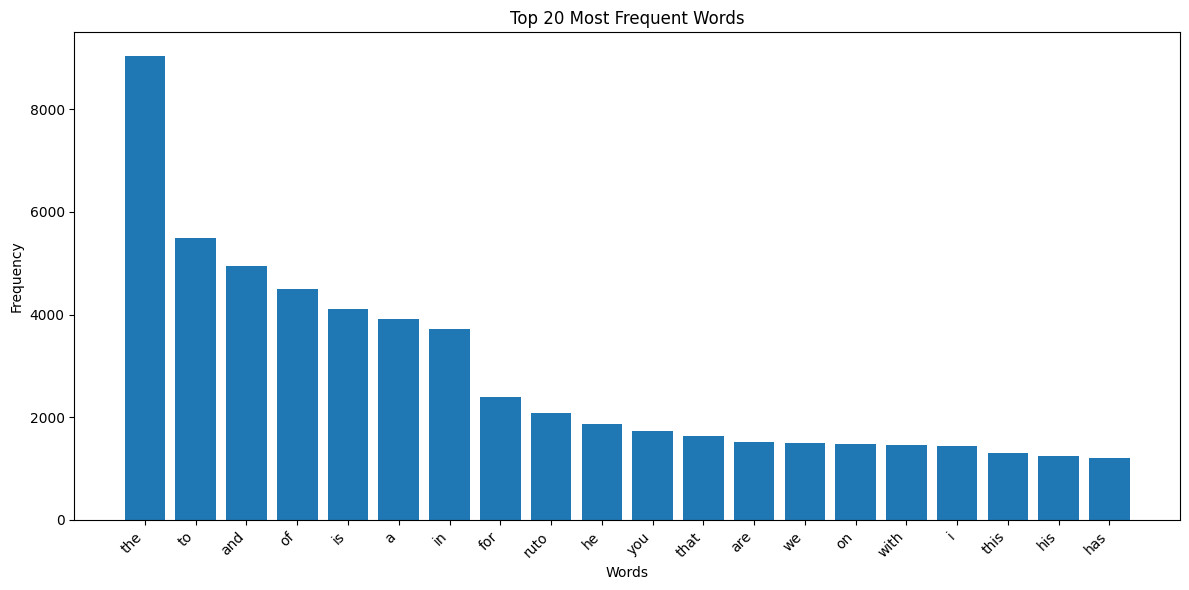

In [ ]:
# Bar Chart of Top Frequent Words
top_n = 20
top_words = word_counts.most_common(top_n)  # Get top N frequent words

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_words)), [val[1] for val in top_words], align='center')  # Plot frequencies
plt.xticks(range(len(top_words)), [val[0] for val in top_words], rotation=45, ha='right')  # Set word labels
plt.title(f"Top {top_n} Most Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Observation**

- The bar chart displays the top 20 most frequent words in the dataset, with "the" appearing as the most common word by a significant margin, occurring over 8,000 times.
- This is followed by other high-frequency words like "to," "and," "is," "of," and "a," all of which are common English stop words.
- The frequencies gradually decrease across the chart, with the 20th word, "be," occurring just over 1,000 times.

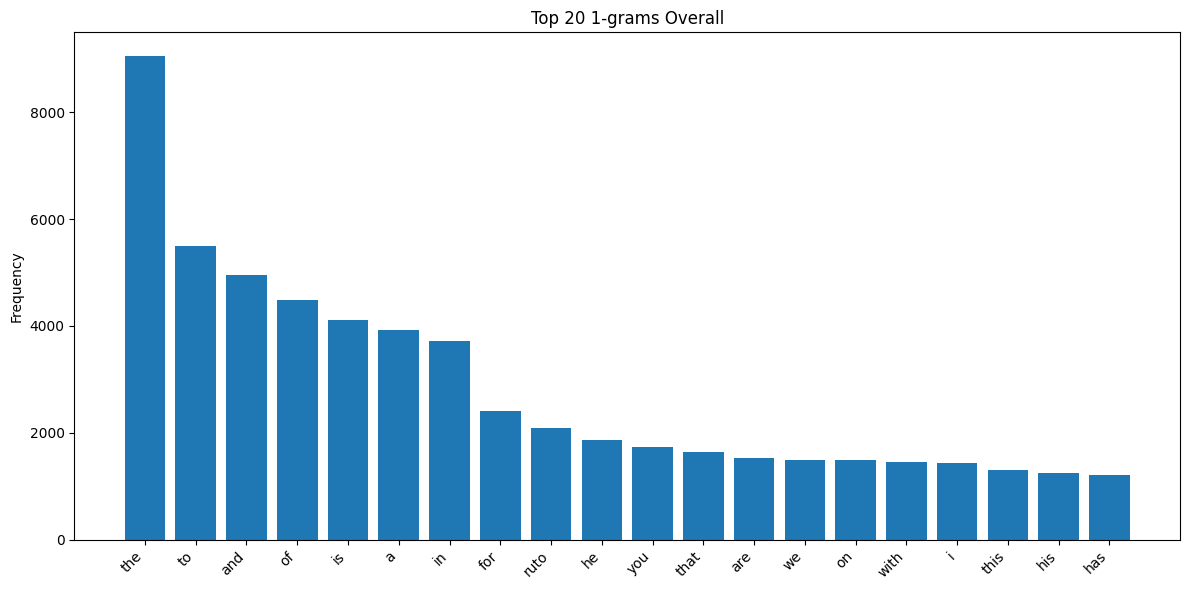

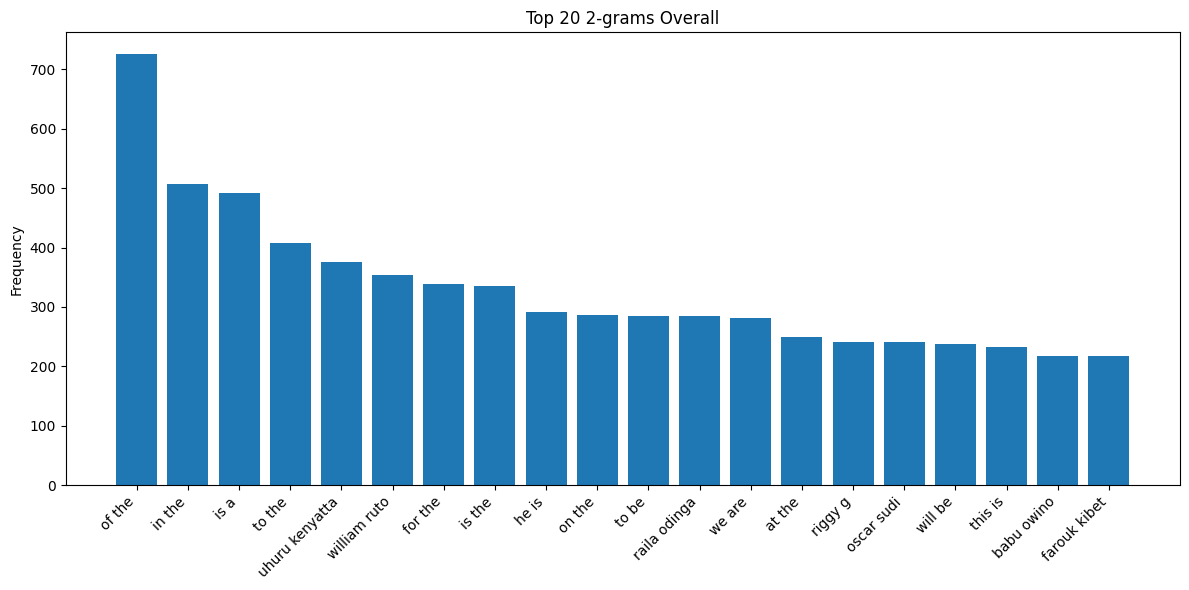

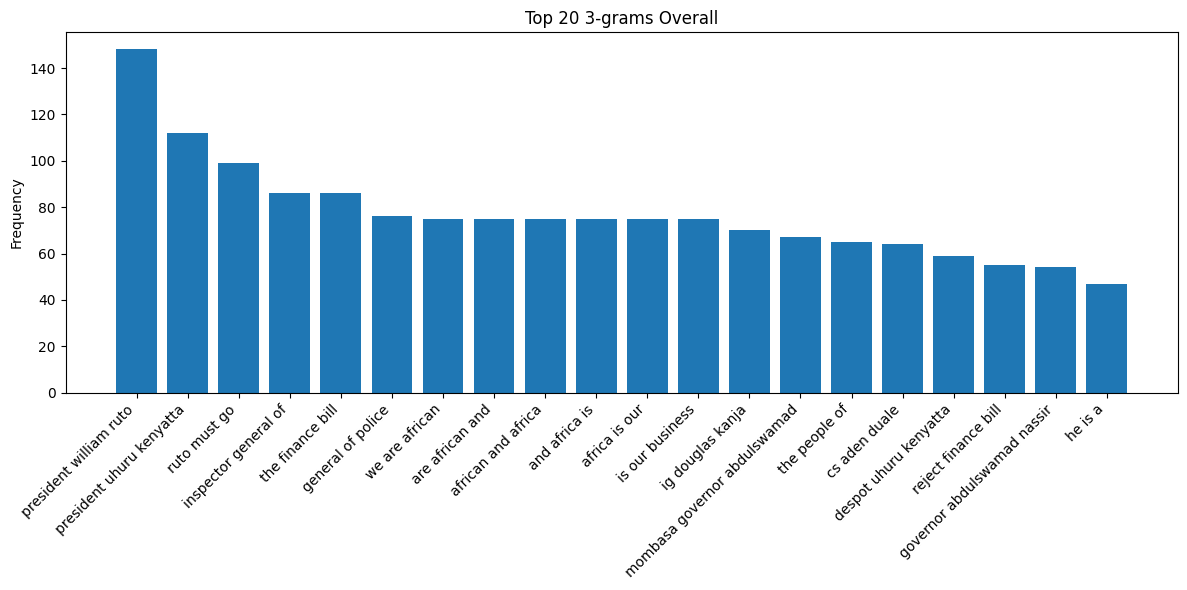

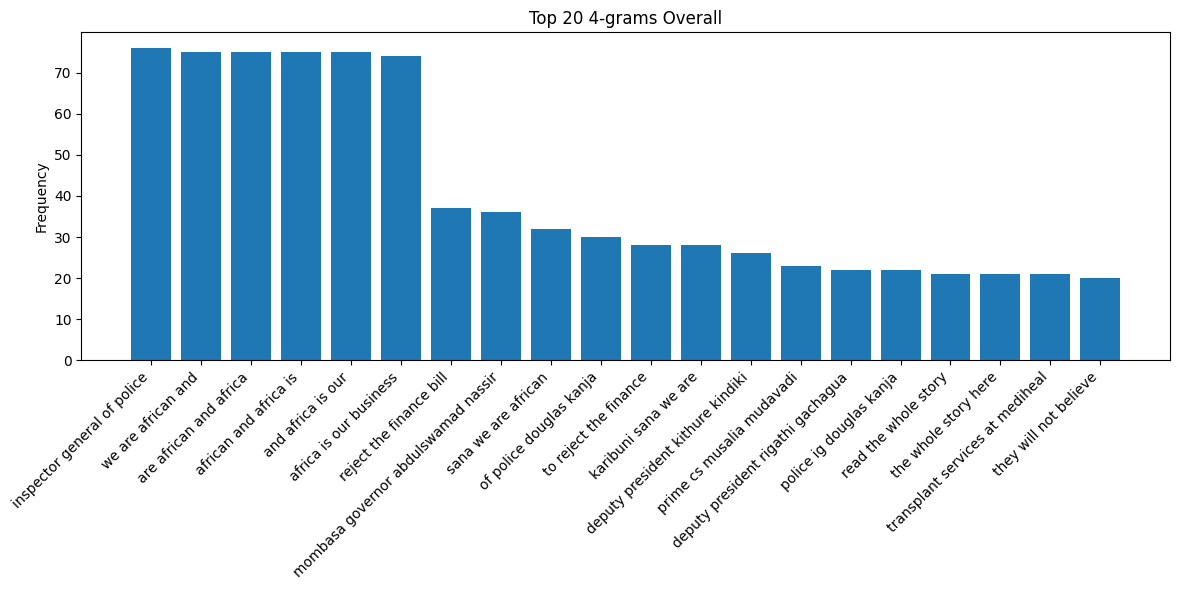

In [ ]:
from nltk import ngrams

# Function to get top n-grams
def get_top_ngrams(text_series, n=1, top_k=10):
    counter = Counter()
    for text in text_series:
        tokens = text.split()
        counter.update(ngrams(tokens, n))
    return counter.most_common(top_k)

N = 20  # Defining the desired number of top N-grams

# Univariate analysis for N-grams
ngram_orders = [1, 2, 3, 4]  # Analyze 1-grams, 2-grams, and 3-grams

for n in ngram_orders:
    top_ngrams_overall = get_top_ngrams(df['cleaned_text'], n=n, top_k=N)
    grams = [' '.join(g) for g, _ in top_ngrams_overall]
    counts = [cnt for _, cnt in top_ngrams_overall]

    plt.figure(figsize=(12, 6))
    plt.bar(grams, counts)
    plt.title(f"Top {N} {n}-grams Overall")
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Observations**

1. **Top 1-grams:**

- Common function words dominate: Words like "the," "to," "and," "is," "of," "a" are the most frequent indicating general grammatical structure.

- Mentions of names: "ruto" and "he" appear prominently, suggesting frequent reference to a person, likely a key subject in the dataset.

- Contextual words like "for," "you," "that," "are," "with," "this," "will" hint at a mix of descriptive, directive, and future-looking content.

2. **Top 2-grams:**

- High frequency of functional phrase pairings: e.g., "of the," "in the," "is a," "to the," "is the."

- Named entities & individuals appear: e.g., "william ruto," "riggy g," "raila odinga," "oscar sudi," "karen nyamu." This implies strong political or public discourse themes.

- Political relevance: Many bigrams relate to government or political figures.

3. **Top 3-grams:**

- Dominance of political terms: e.g., "president william ruto," "ruto must go," "reject finance bill."

- Clear protest phrases: Suggests the dataset may include social or political criticism or rallying messages.

Thematic clusters:

- Politics/Governance: "cs aden duale," "the people of," "finance bill."

- Identity & Culture: "we are african," "african and africa," "africa is our."

4. **Top 4-grams**

- Activist/protest language is even clearer: e.g., "reject the finance bill," "to reject the finance," "incompetent amp corrupt."

- Recurring focus on African identity: Multiple phrases like "we are african and," "africa is our business."

- Mentions of government institutions and figures: e.g., "inspector general of police," "deputy president kithure kindiki," "first lady rachel ruto."

#### Character Frequency Analysis

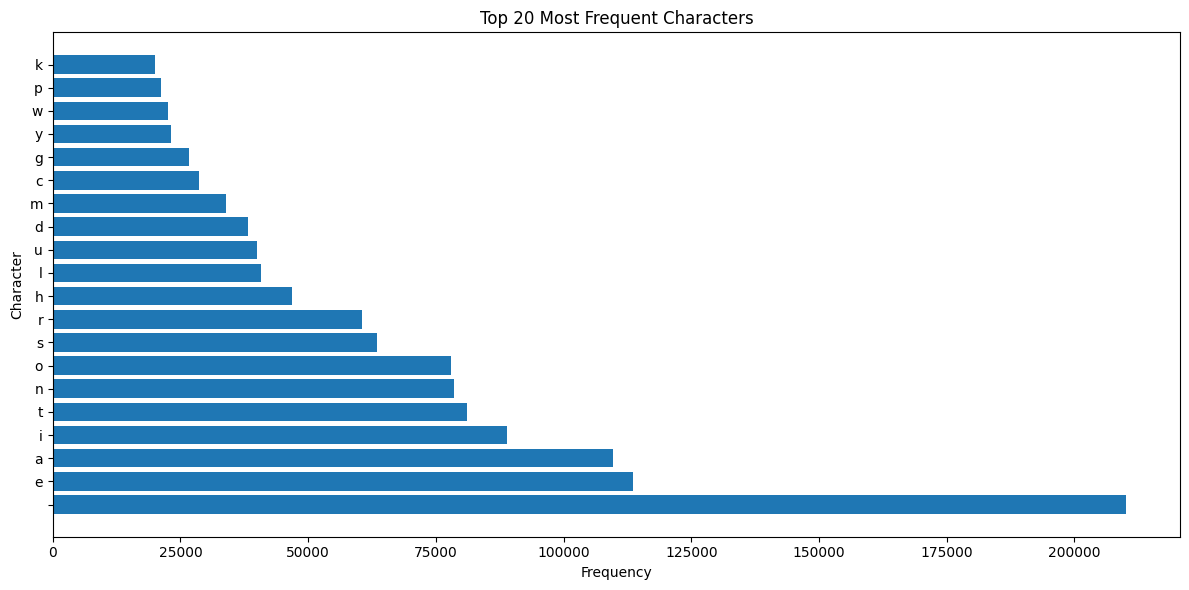

In [ ]:
# Combine all text into a single string
all_text = ''.join(df1['cleaned_text'].astype(str).tolist())

# Calculate character frequencies
char_counts = Counter(all_text)

# Create a DataFrame for easier handling
char_freq_df = pd.DataFrame.from_dict(char_counts, orient='index', columns=['frequency']).sort_values('frequency', ascending=False)

# Plot the top N most frequent characters
plt.figure(figsize=(12, 6))
plt.barh(char_freq_df.index[:top_n], char_freq_df['frequency'][:top_n])
plt.title(f'Top {top_n} Most Frequent Characters')
plt.ylabel('Character')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

**Observation**

- The bar chart displays the top 20 most frequent characters, showing that vowels dominate the distribution, with 'e' being the most common character by a large margin, followed by 'a', 'i', and 't'.
- This pattern aligns with general English language usage, where vowels and certain consonants like 'n', 's', and 'r' appear frequently.
- Less frequent characters like 'k', 'p', and 'w' occur significantly less often, suggesting they play a more limited role in the overall text content.

### Word distribution and Frequency of labels

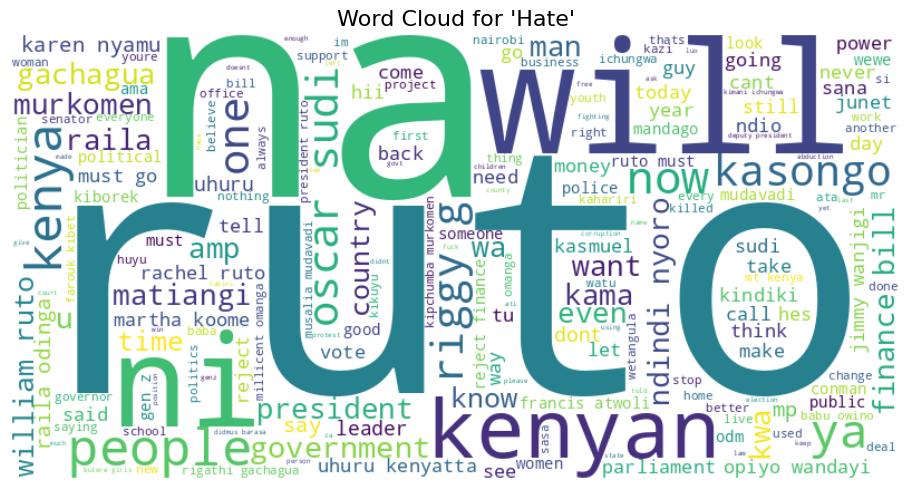

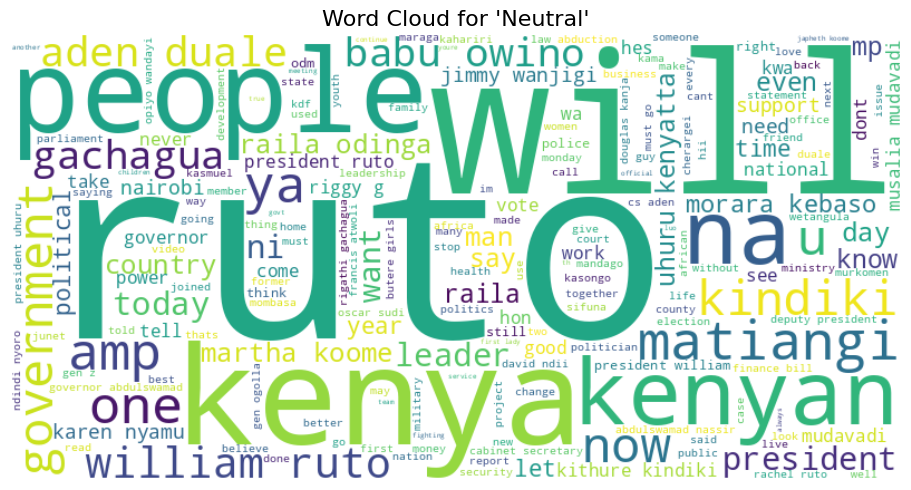

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_wordcloud(df, label_value):
    texts = df1[df1['label'] == label_value]['cleaned_text']
    all_text = " ".join(texts)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for '{label_value.capitalize()}'", fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate word cloud for each label
for category in ['hate',  'neutral']:
    generate_wordcloud(data, category)


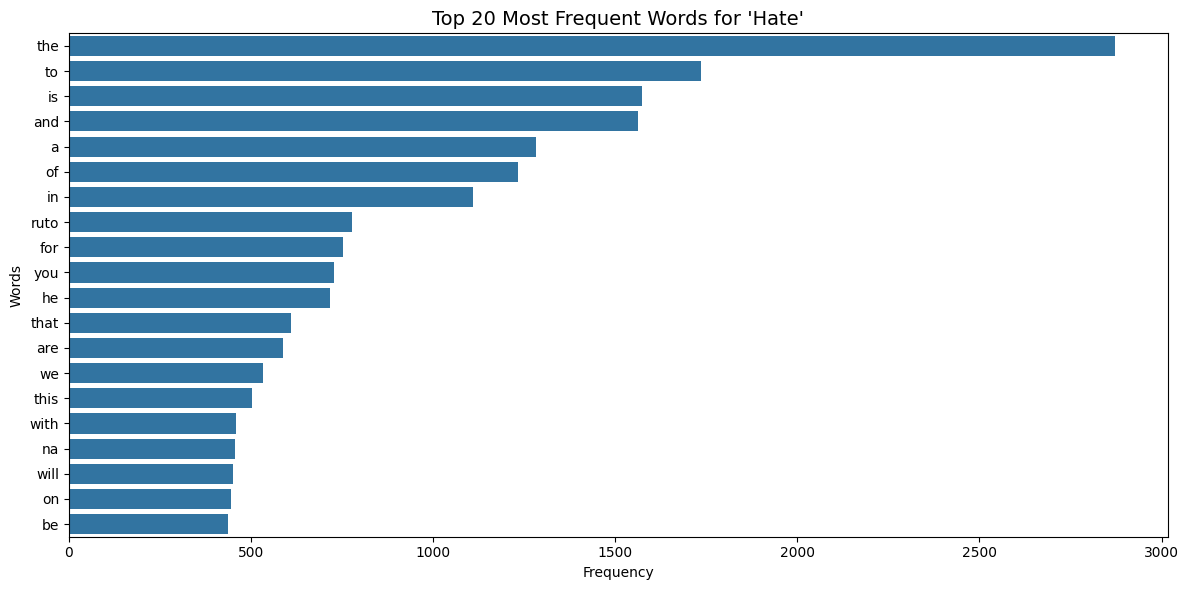

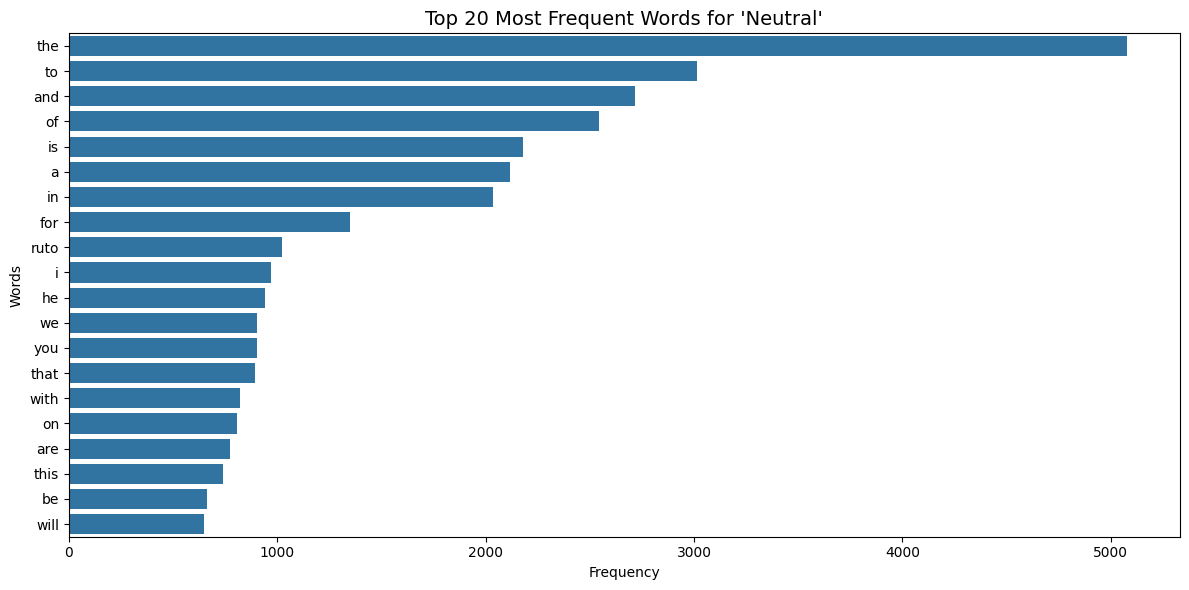

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(df, label_value, top_n=20):
    texts = df1[df1['label'] == label_value]['cleaned_text']
    all_words = " ".join(texts).split()
    word_freq = Counter(all_words)
    common_words = word_freq.most_common(top_n)

    words, freqs = zip(*common_words)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(freqs), y=list(words))
    plt.title(f"Top {top_n} Most Frequent Words for '{label_value.capitalize()}'", fontsize=14)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.tight_layout()
    plt.show()

# Plot for each category
for category in ['hate', 'neutral']:
    plot_top_words(data, category)


**Observations**
1. Based on hate:

- Dominance of Stop Words: The most striking observation is that the top few words are overwhelmingly common English stop words like "the," "to," "and," "is," and "a." These words appear with very high frequency, with "the" being the most frequent by a significant margin (almost 1600 occurrences).

- Content Words Appear Lower Down: It takes until the 8th position to see a word that carries more specific meaning in this context: "ruto." This suggests that while the analysis is focused on "hate," the surrounding text likely contains a lot of standard English grammar.

- "Ruto" as a Key Entity: The word "ruto" stands out as the most frequent content word in this list, appearing over 400 times. This strongly implies that discussions related to "hate" in this dataset frequently involve or mention "Ruto," likely William Ruto, given the context from the previous word cloud.


2. Based on Neutral:

- Overwhelming Dominance of Stop Words: Just like the previous charts for "hate", this chart is also heavily dominated by common English stop words at the top. "The" has an exceptionally high frequency, exceeding 5000 occurrences. Words like "to," "and," "of," "is," and "a" also appear with very high frequencies.

- "Ruto" Still Present, but Further Down: The word "ruto" appears again, but it's even lower in the ranking compared to the "offensive" chart (around the 10th position). This suggests that while "Ruto" might be mentioned in some neutral contexts within the dataset, it's less central to discussions labeled as "neutral" than it is to those labeled as "hate" or "offensive."

## Bi-variate Analysis

### Tweet Volume by Engagement

In [ ]:
# Convert 'created_at' to datetime
df1['created_at'] = pd.to_datetime(df1['created_at'])

# Group data by date
df1['date'] = df1['created_at'].dt.date

# Calculate Tweet Volume and Engagement
tweet_volume = df1.groupby('date')['cleaned_text'].count()
engagement = df1.groupby('date')['likes'].sum() + df1.groupby('date')['retweets'].sum() + df1.groupby('date')['total_replies'].sum()

### Engagement Score vs Hour / Day / Month

See when tweets get the most traction.

#### 1. Engagement Score vs Hour of Day

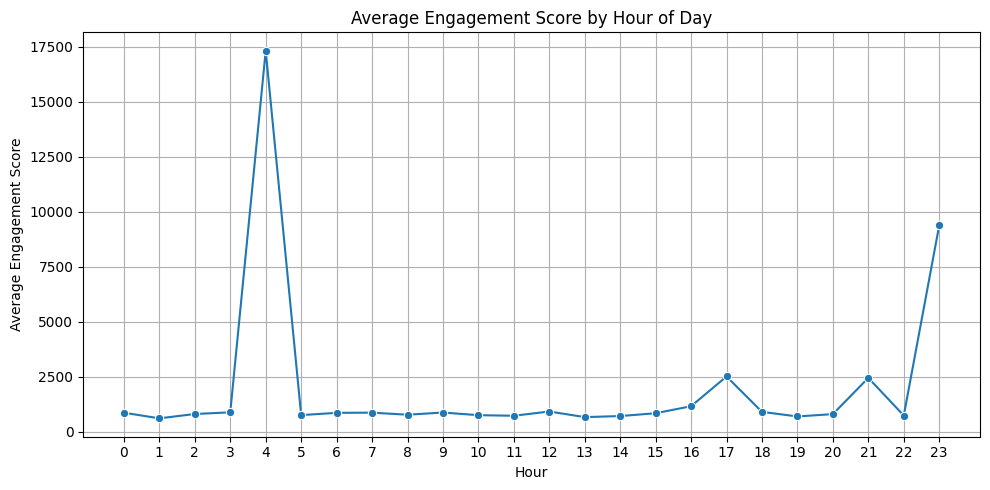

In [ ]:
# Group and average engagement score by hour
hourly_engagement = df1.groupby('hour')['engagement_score'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_engagement.index, y=hourly_engagement.values, marker='o')
plt.title('Average Engagement Score by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Engagement Score')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

**Observations**

- Morning Dip: Average engagement appears relatively low in the early morning hours (around 0 to 3).
- Generally Low During Daytime: Throughout most of the daytime hours (roughly 6 to 17), the average engagement score remains relatively low and stable.
- Evening Increase: There's a noticeable increase in average engagement starting in the late afternoon/early evening (around hour 17).
- Another Peak at Hour 23: Another, though less extreme than hour 4, peak in average engagement occurs at hour 23.
- Fluctuations: The average engagement score varies throughout the day, suggesting that the time of posting can influence engagement.

#### 2. Engagement Score vs Month

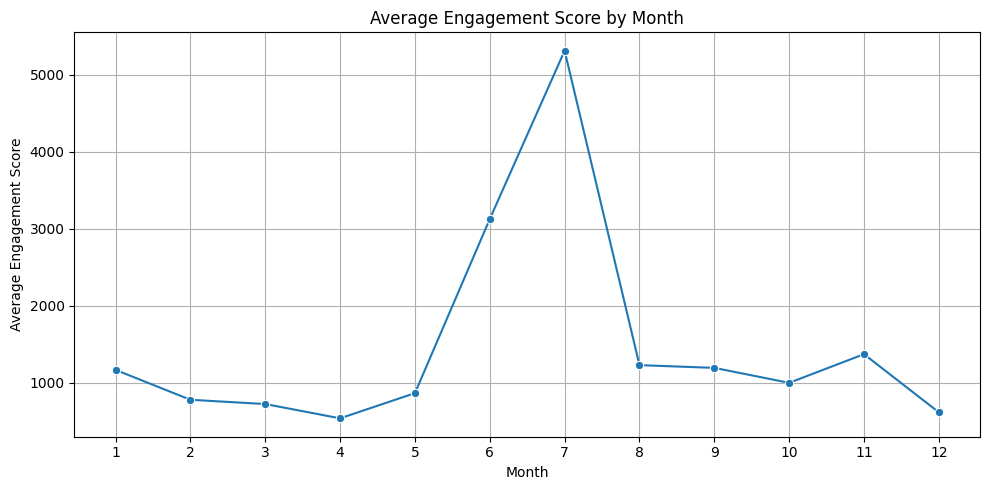

In [ ]:
# Group by month
monthly_engagement = df1.groupby('month')['engagement_score'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_engagement.index, y=monthly_engagement.values, marker='o')
plt.title('Average Engagement Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Engagement Score')
plt.grid(True)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

**Observations**

- Peak in July (Month 7): There's a clear and significant peak in the average engagement score during the month of July.
- Low Engagement in Early Months: The average engagement appears relatively low in the first few months of the year (January to April).
- Increase Around June: There's a noticeable increase in average engagement starting around June.
- Dip After July: Following the peak in July, there's a sharp decline in average engagement in August.
- Moderate Engagement in Later Months: The average engagement fluctuates in the later months (August to December) but generally stays at a moderate level compared to the July peak.
- Seasonality Suggestion: The variations across the months hint at potential seasonality in engagement, with July being a particularly high-engagement period.

#### Engagement Score vs Holiday Name

- Do people engage more during specific holidays?

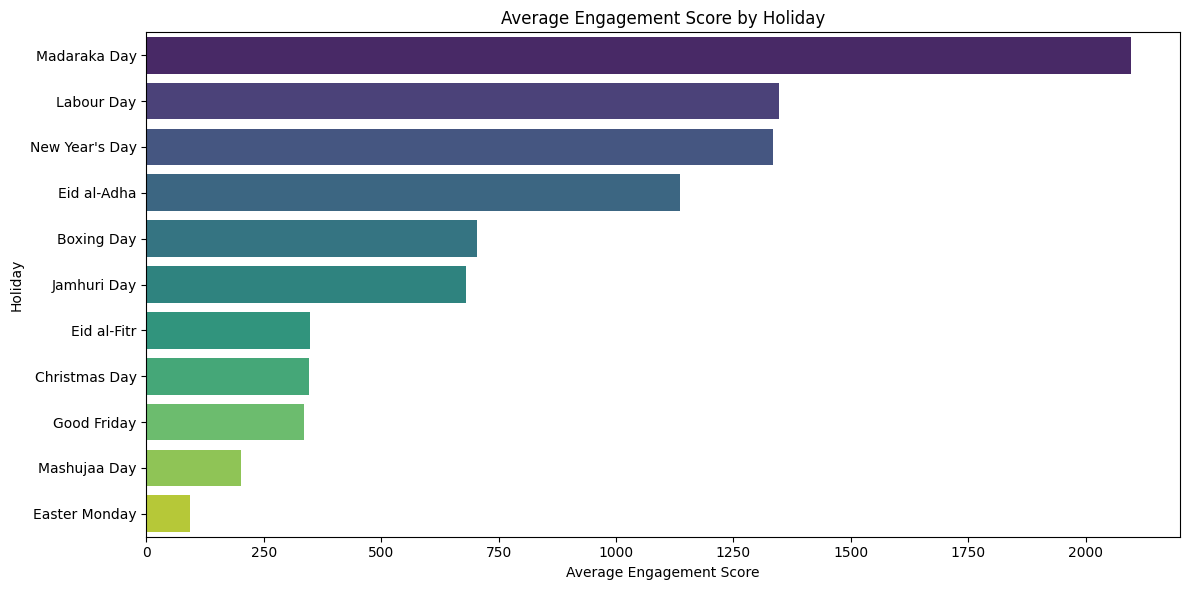

In [ ]:
# Filter out non-holiday rows (if holidays are labeled as empty string or NaN)
holiday_df = df1[df1['holiday_name'].notnull() & (df1['holiday_name'] != '')]

# Group by holiday and calculate average engagement
holiday_engagement = holiday_df.groupby('holiday_name')['engagement_score'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=holiday_engagement.values, y=holiday_engagement.index, palette='viridis')
plt.title('Average Engagement Score by Holiday')
plt.xlabel('Average Engagement Score')
plt.ylabel('Holiday')
plt.tight_layout()
plt.show()

**Observations**
- Madaraka Day Leads: Madaraka Day shows the highest average engagement score, significantly higher than all other holidays.
- Labour Day and New Year's Day are High: Labour Day and New Year's Day also exhibit relatively high average engagement scores, though lower than Madaraka Day.
- Eid al-Adha Shows Moderate Engagement: Eid al-Adha has a moderate average engagement score, falling in the middle of the pack.
- Boxing Day and Jamhuri Day Similar: Boxing Day and Jamhuri Day have quite similar average engagement scores.
- Eid al-Fitr and Good Friday Lower: Eid al-Fitr and Good Friday show lower average engagement compared to the top holidays.
- Christmas Day and Mashujaa Day Even Lower: Christmas Day and Mashujaa Day have even lower average engagement scores.
- Easter Monday with the Lowest: Easter Monday has the lowest average engagement score among the listed holidays.
- Varied Engagement Across Holidays: There's a considerable range in average engagement scores across different holidays, suggesting that the specific holiday can significantly influence engagement levels.

###  Engagement Breakdown
**Likes / Retweets / Replies vs Label**

- Are negative tweets more likely to be retweeted?

- Do positive tweets get more likes?

- Are replies more common on neutral tweets?

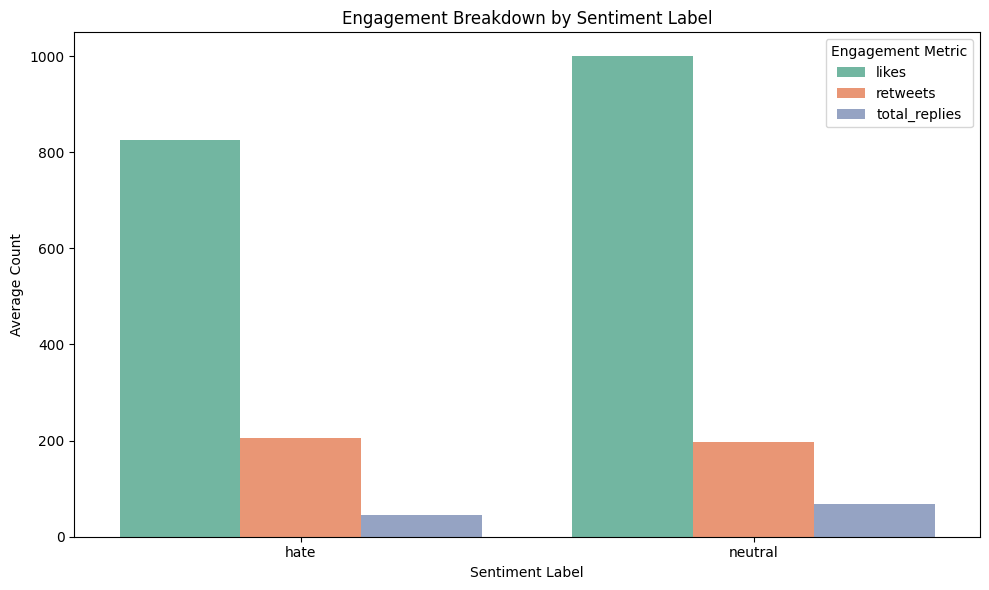

In [ ]:
# Group by sentiment label and calculate average likes, retweets, and replies
engagement_metrics = df1.groupby('label')[['likes', 'retweets', 'total_replies']].mean().reset_index()

# Melt for seaborn compatibility
engagement_melted = engagement_metrics.melt(id_vars='label',
                                             value_vars=['likes', 'retweets', 'total_replies'],
                                             var_name='Metric', value_name='Average Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=engagement_melted, x='label', y='Average Count', hue='Metric', palette='Set2')
plt.title('Engagement Breakdown by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Count')
plt.legend(title='Engagement Metric')
plt.tight_layout()
plt.show()

**Observations**
- Likes Consistently Highest: Across all sentiment labels (hate and neutral), the average number of likes is significantly higher than the average number of retweets and total replies.

- Neutral Posts Have Highest Like Counts: Posts labeled as "neutral" have the highest average number of likes compared to "hate" posts.

- Retweets Relatively Stable: The average number of retweets is fairly consistent across all three sentiment labels, showing only a slight variation.

- Replies Lowest Across All: The average number of total replies is the lowest among the three engagement metrics for all sentiment categories.

- Neutral Posts Have Highest Replies: Similar to likes, "neutral" posts also have the highest average number of total replies, although the difference compared to "hate" which is less pronounced than with likes.

- "Hate" Shows Lowest Engagement Overall (Normalized by Count): While likes are still highest for "hate" posts, when looking at the relative scale of all three metrics, "hate" posts tend to have a lower overall engagement compared to "neutral"  posts within this visualization's representation of average counts.

#### Likes / Retweets vs Time Features (hour, day, month)

Understand timing of virality.

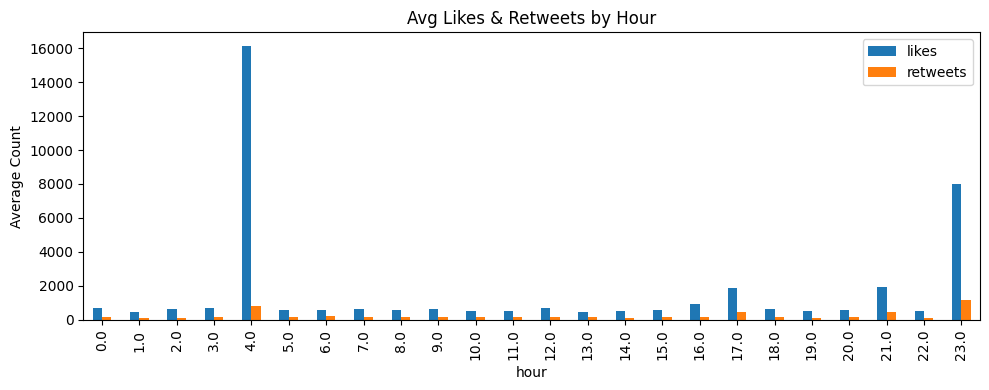

In [ ]:
# Likes & Retweets by Hour
df1.groupby('hour')[['likes', 'retweets']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Avg Likes & Retweets by Hour')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

**Observations**

- Dominance of Likes: Across almost all hours, the average number of likes is significantly higher than the average number of retweets. This reinforces the earlier observation that likes are the most frequent form of engagement.

- Sharp Spike in Likes at Hour 4: There's a very prominent spike in the average number of likes at hour 4. This hour stands out as having exceptionally high like engagement compared to all other hours.

- Smaller Increase in Likes at Hour 23: We also see a noticeable, though less extreme than hour 4, increase in the average number of likes at hour 23.

- Relatively Low and Stable Retweets: The average number of retweets remains relatively low and stable throughout most of the day, with no dramatic spikes comparable to the likes.

- Slight Increase in Retweets at Hour 23: Similar to likes, there's a small increase in the average number of retweets at hour 23, though it's much less pronounced.

- Morning Dip in Likes: The average number of likes is generally lower in the very early morning hours (around 0 to 3).

- Daytime Consistency: During most of the daytime hours (roughly 6 to 17), the average number of both likes and retweets stays at a relatively consistent and low level.

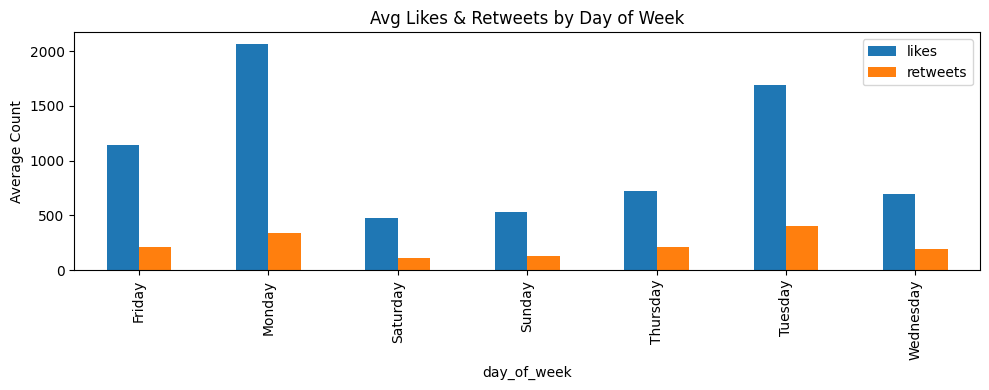

In [ ]:
# Likes & Retweets by Day of Week
df1.groupby('day_of_week')[['likes', 'retweets']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Avg Likes & Retweets by Day of Week')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

**Observations**
- Likes Consistently Higher: Just like the hourly data, the average number of likes is higher than the average number of retweets for every day of the week.

- Monday Shows Highest Likes: Monday has the highest average number of likes, standing out significantly from the other days.

- Tuesday Also High in Likes: Tuesday also shows a relatively high average number of likes, though not as high as Monday.

- Lowest Likes on Saturday: Saturday exhibits the lowest average number of likes.

- Retweets Follow a Similar Trend (but Lower): The pattern of retweets across the week somewhat mirrors the likes, with Monday and Tuesday having higher average retweet counts compared to Saturday, which has the lowest. However, the differences in retweet counts between the days are less dramatic than the differences in like counts.

- Mid-Week Dip: There appears to be a slight dip in average likes and retweets around the middle of the week (Wednesday and Thursday) before picking up again towards the beginning of the week.

- Weekend Lows: Both average likes and retweets tend to be lower on the weekend (Saturday and Sunday) compared to weekdays.

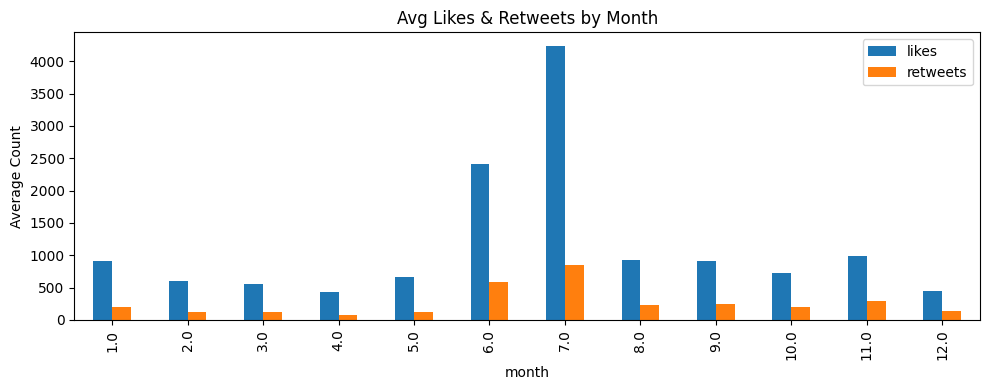

In [ ]:
# Likes & Retweets by Month
df1.groupby('month')[['likes', 'retweets']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('Avg Likes & Retweets by Month')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()

**Observations**

- Likes Consistently Higher: Across all months, the average number of likes is notably higher than the average number of retweets. This aligns with previous observations.

- Peak in Likes in July (Month 7): July exhibits a significant peak in the average number of likes, standing out considerably from the other months.

- Increase in Likes Around June: There's a noticeable increase in the average number of likes starting around June, leading up to the July peak.

- Retweets Peak in July as Well: The average number of retweets also peaks in July, coinciding with the peak in likes, although the increase is less dramatic relative to the baseline.

- Generally Lower Engagement in Early Months: The average number of both likes and retweets tends to be lower in the earlier months of the year (January to April).

- Moderate Engagement in Later Months: Following the July peak, the average engagement for both likes and retweets generally returns to more moderate levels for the remaining months of the year.

- Similar Monthly Trends: The trends for average likes and retweets across the months appear somewhat similar, suggesting that months with higher like counts also tend to have higher retweet counts.

#### Engagement Score vs Politician

Which politicians trigger more public interaction?

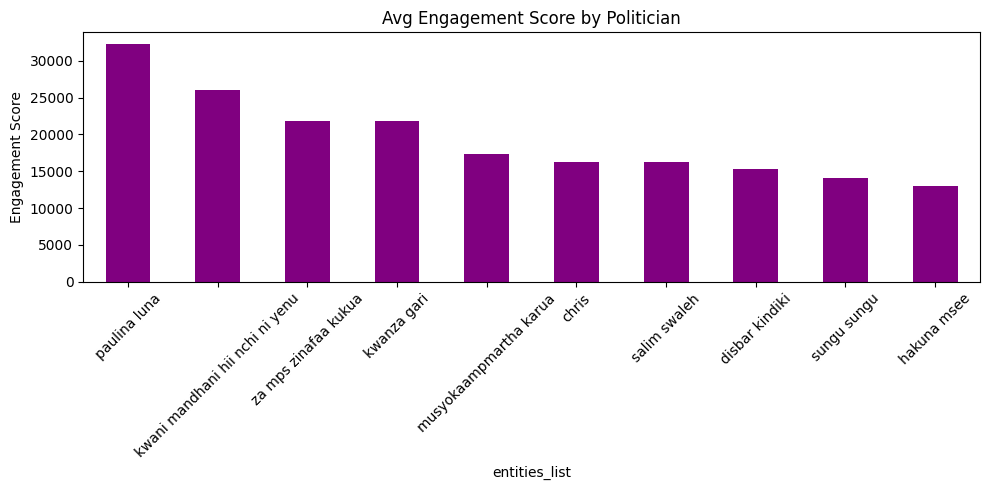

In [ ]:
# Ensure 'entities' column is clean and split
df1['entities'] = df1['entities'].fillna('')
df1['entities_list'] = df1['entities'].str.lower().str.split(',')

# Explode to have one row per politician mention
df_exploded = df1.explode('entities_list')
df_exploded['entities_list'] = df_exploded['entities_list'].str.strip()

# Group and get average engagement score per politician
engagement_by_politician = df_exploded.groupby('entities_list')['engagement_score'].mean().sort_values(ascending=False).head(10)

# Plot
engagement_by_politician.plot(kind='bar', figsize=(10,5), color='purple')
plt.title('Avg Engagement Score by Politician')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observations**

- Anna Paulina Leads: Anna Paulina has the highest average engagement score, significantly higher than all other listed politicians.

- Kwani Mandhani Hii Second Highest: Kwani Mandhani Hii shows the second-highest average engagement score.

- Gradual Decline Afterwards: Following the top two, there's a gradual decline in the average engagement scores for the subsequent politicians: Surah Ad Duha, Kwanza Gari Za MPs Zinafaa Kukua, Musyokaampmartha Karua, Farah Ichungwa, Nkaiserry, Chris, Salim Swaleh, and Ya Ruto Matiangi.

- Ya Ruto Matiangi Lowest: Ya Ruto Matiangi has the lowest average engagement score among the politicians displayed.

- Noticeable Drop from Top Two: There's a noticeable drop in average engagement from the top two politicians to the rest of the group.

- Relatively Similar Scores for the Middle Group: The average engagement scores for the politicians ranked from third (Surah Ad Duha) to around eighth (Chris) are relatively closer to each other compared to the top two.

### Sentiment / Hate Label vs Time / Activity
#### Label vs Hour / Day / Month

When is hate speech most likely?



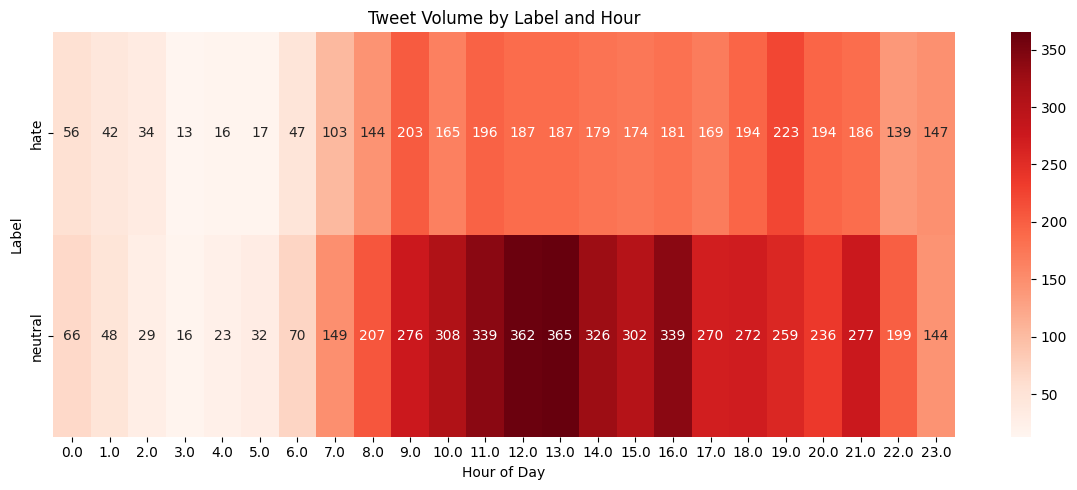

In [ ]:
# Create a pivot table: count of tweets by label and hour
heatmap_data = df1.pivot_table(index='label', columns='hour', values='cleaned_text', aggfunc='count', fill_value=0)

# Plot
plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='d')
plt.title('Tweet Volume by Label and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Label')
plt.tight_layout()
plt.show()

**Observations**

- Neutral Tweets Dominate: Across all hours of the day, the volume of tweets labeled as "neutral" is significantly higher than the volume of tweets labeled as "hate" . This is visually represented by the darker red band in the "neutral" row.

- Peak Tweet Volume Around Midday for Neutral: The volume of "neutral" tweets appears to peak around the middle of the day, roughly between hours 9 and 15, showing the darkest shades of red in that row.

- Lower and More Consistent Volume for Hate : The volume of tweets labeled as "hate"  is considerably lower across all hours compared to "neutral." The color intensity in these rows is much lighter.

- Slight Increase in Hate and Offensive Tweets During Daytime: While still low compared to "neutral," there seems to be a slight increase in the volume of "hate" tweets during the daytime hours (roughly 7 to 22) compared to the very early morning.

- Early Morning Low for All Labels: The tweet volume for all three labels ("hate," and "neutral,) is generally lower in the very early morning hours (around 0 to 6).

- Hour-to-Hour Variation: There is some hour-to-hour variation in tweet volume within each label, but the overall trend of "neutral" being highest and relatively consistent patterns for "hate" holds.

#### Label vs Holiday

Is hate speech more or less common on holidays?

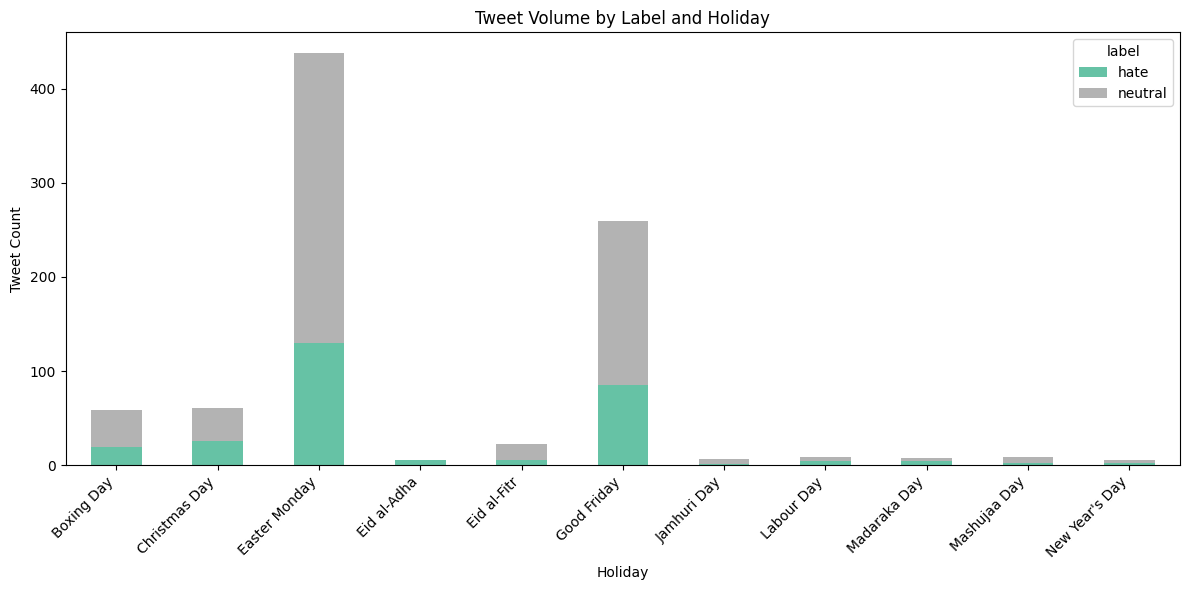

In [ ]:
# Count tweets by label and holiday name
label_holiday_counts = df1.groupby(['holiday_name', 'label']).size().unstack().fillna(0)

# Plot
label_holiday_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title('Tweet Volume by Label and Holiday')
plt.xlabel('Holiday')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Observations**

- Easter Monday stands out with the highest overall tweet volume: The combined height of the "hate" and "neutral" bars for Easter Monday is significantly larger than for any other holiday shown.

- Neutral tweets generally outnumber hate tweets: For almost every holiday, the gray portion of the bar (representing "neutral" tweets) is taller than the teal portion (representing "hate" tweets). This indicates a higher volume of neutral tweets compared to hate tweets for most occasions.

- The proportion of hate tweets varies by holiday: While neutral tweets dominate overall, the proportion of hate tweets seems to be higher for certain holidays compared to others. For instance, while Easter Monday has the highest total volume, the relative size of the "hate" portion of the bar appears larger than for some of the holidays with lower overall volume.

- Several holidays show very low tweet volume: Holidays like Eid al-Adha, Eid al-Fitr, Jamhuri Day, Labour Day, Madaraka Day, Mashujaa Day, and New Year's Day all have considerably lower tweet counts for both hate and neutral categories compared to Easter Monday, Good Friday, and Boxing Day.

- Good Friday also shows a notable volume of both hate and neutral tweets: After Easter Monday, Good Friday has the next highest total tweet count, with a substantial number of both hate and neutral tweets.

- Boxing Day and Christmas Day have similar, moderate tweet volumes: These two holidays show comparable total tweet counts, with neutral tweets being more prevalent than hate tweets.



#### Tweet Volume by Sentiment

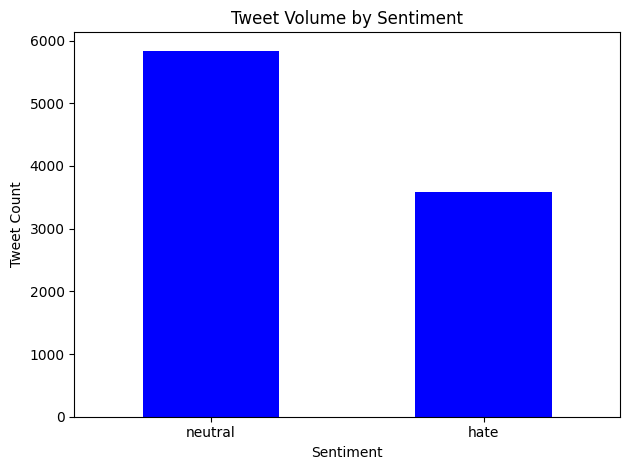

In [ ]:
# Count tweets per sentiment
df1['label'].value_counts().plot(kind='bar', title='Tweet Volume by Sentiment', color ='blue')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Observations**
- Neutral Tweets are the Most Frequent: The  bar representing "neutral" tweets is significantly taller than the other bars, indicating that the largest volume of tweets in this dataset is labeled as neutral.

- Hate Tweets are the Least Frequent: The bar representing "hate" tweets is the shortest, showing that tweets classified as hate have the lowest volume compared to neutral  tweets.



## Multi-variate Analysis

### Engagement by Label categories

In [ ]:
# Melt individual engagement types
long_df = pd.melt(
    df1,
    id_vars='label',
    value_vars=['likes_bin', 'retweets_bin', 'replies_bin'],
    var_name='engagement_type',
    value_name='bin_value'
)

# Clean up engagement type names
long_df['engagement_type'] = long_df['engagement_type'].str.replace('_bin', '').str.capitalize()

# Append the combined engagement data
comb_engagement_df = df1[['label', 'engagement_bin']].rename(columns={'engagement_bin': 'bin_value'})
comb_engagement_df['engagement_type'] = 'Total'
long_df = pd.concat([long_df, comb_engagement_df], ignore_index=True)

# Plotly faceted bar chart with combined engagement
fig = px.histogram(
    long_df,
    x='bin_value',
    color='label',
    facet_col='engagement_type',
    category_orders={
        'bin_value': ['0', '1-10', '11-100', '101-1k', '1001-10k', '10k+'],
        'engagement_type': ['Likes', 'Retweets', 'Replies', 'Total']
    },
    color_discrete_sequence=px.colors.qualitative.Set2,
    barmode='group',
    title="Tweet Labels by Engagement Type and Bin (Including Total)",
    labels={'bin_value': 'Engagement Bin', 'count': 'Tweet Count'},
    height=1000,
    width=2400
)

fig.update_layout(
    showlegend=True,
    legend_title_text='Label'
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Clean up facet titles

fig.show()


**Observations**:

1. Neutral tweets dominate all engagement types and bins.

2. Hate tweets tend to cluster more in lower engagement bins.

3. The number of tweets sharply drops in higher engagement bins across all categories.

**Insights from Likes**

1. Most tweets with no likes (bin 0) are neutral, but a significant number are also offensive or hate.

2. As engagement increases, neutral tweets become even more dominant.

3. Very few hate tweets receive 10k+ likes.

**Insights from Retweets**

1. Similar pattern to likes: neutral tweets are most common, even more so in higher bins.

2. Very  hate tweets make it past the 101-1k retweet range.

3. No hate  tweets in the 10k+ retweet bin.

**Insights from Replies**

1. Replies show a higher proportion of  hate tweets, especially at 0 and 1–10 reply bins.

2. Still, neutral tweets dominate in total count, especially in the 1–100 reply range.

3. A steep drop-off in all categories beyond the 101–1k bin.

**Insights from Total Engagement**

1. The total view mirrors the trends from individual categories:

2. Neutral tweets are consistently the most engaged.

3. Hate tweets are far less likely to receive high engagement.


### Word count vs text length per label category

In [ ]:
# Calculate mean word count and mean text length per label
mean_stats = df1.groupby('label')[['word_count', 'text_length']].mean().reset_index()

# Melt to long format for grouped bar plot
mean_stats_melted = mean_stats.melt(id_vars='label', var_name='Metric', value_name='Mean Value')

# Create grouped bar chart
fig = px.bar(
    mean_stats_melted,
    x='label',
    y='Mean Value',
    color='Metric',
    barmode='group',
    text='Mean Value',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Mean Word Count and Text Length per Tweet Label',
    labels={'label': 'Tweet Label', 'Mean Value': 'Mean'}
)

# Update layout for aesthetics
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    yaxis_title='Mean Value',
    xaxis_title='Label',
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    height=500,
    width=800
)

fig.show()

**Observations**

1. Text Length (in characters):

Hate tweets - (136.38)

Neutral tweets - (135.70)

- Suggests that hate tweets tend to be slightly longer, possibly due to more elaborate or emotionally charged language.

- The average tweet length falls between 130-140 characters for all categories


2. Word Count:

Hate tweets - (23.65)

neutral tweets - (23.10)

- The variation is relatively small but may indicate that hate and offensive tweets use slightly more words, possibly to express more complex or heated messages.

- The average tweeet word count falls between 23-24 words for all categories.


### Distribution of Word count vs text length per label category

<Figure size 1200x800 with 0 Axes>

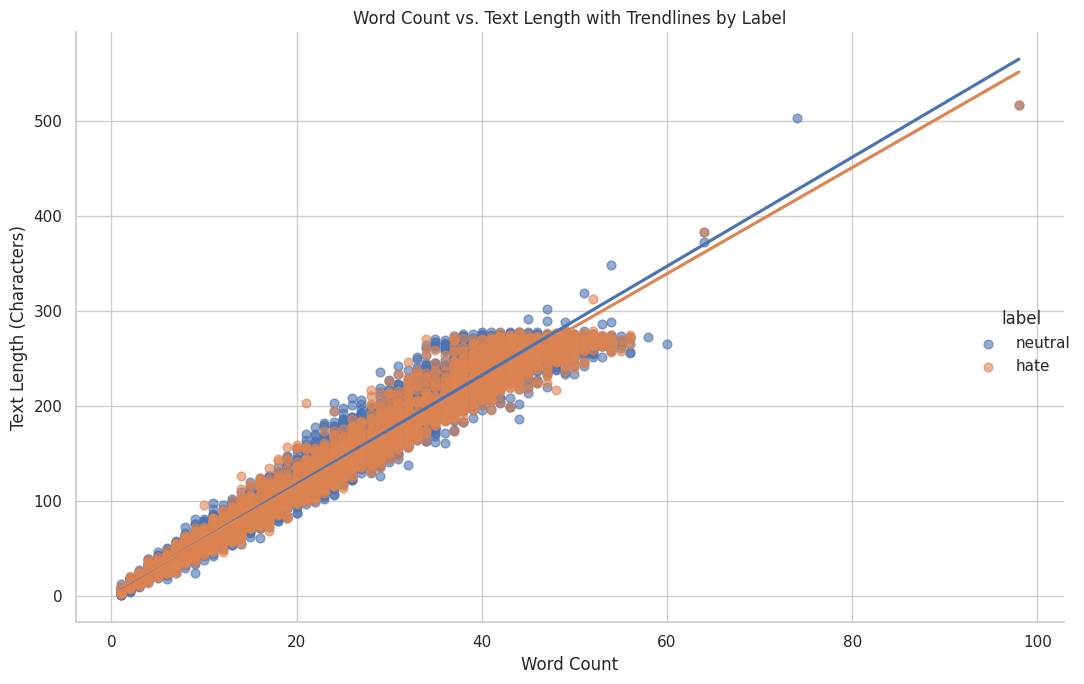

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size and style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the scatter plot with trendlines
sns.lmplot(
    data=df1,
    x='word_count',
    y='text_length',
    hue='label',
    scatter_kws={'alpha': 0.6, 's': 40},
    height=7,
    aspect=1.4,
    markers='o',
    ci=None  # Confidence interval off (like Plotly's OLS)
)

# Customize labels and title
plt.xlabel("Word Count")
plt.ylabel("Text Length (Characters)")
plt.title("Word Count vs. Text Length with Trendlines by Label")
plt.tight_layout()

plt.show()


**Observations**

1. Positive Correlation:

- A positive trend line across most or all categories suggests that as tweet length increases, the number of words also increases.

- This makes intuitive sense: longer tweets can hold more words.

2. Category Differences:

- Some categories tend to use longer or more complex words (lower word count for same tweet length).

- Others may use shorter, more concise language (higher word count for same tweet length).


3. Outliers:

- Points far from the trend line could be outliers most likely spam content, unusually wordy or concise tweets.

4. Compactness of Categories:

- Tightly clustered points imply similar writing style or length.

In [ ]:
# Create the correlation matrix
corr_matrix = df1[['likes', 'retweets', 'total_replies']].corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.index,
    colorscale='Viridis',  # You can choose other color scales like 'Cividis', 'Plasma', etc.
    colorbar=dict(title='Correlation'),
))

# Update layout to customize the dimensions
fig.update_layout(
    title="Correlation Heatmap of Likes, Retweets & Replies",
    xaxis_title="Features",
    yaxis_title="Features",
    xaxis=dict(tickmode='array'),
    yaxis=dict(tickmode='array'),
    width=800,  # Adjust the width of the heatmap
    height=600  # Adjust the height of the heatmap
)

fig.show()


**Observations**

1. Strong Positive Correlation Between Likes and Retweets

Correlation ≈ 0.95+ (very close to 1)

Indicates that tweets getting more likes are also highly likely to be retweeted, and vice versa.

These two features are likely reflecting similar audience engagement behaviors.

2. Moderate Correlation Between Retweets and Replies
The value seems lower (around ~0.76).

Suggests that while retweeted tweets may get replies, it's not as tightly linked as likes/retweets.

Retweets may spread content but not always spark conversation.

3. Lowest Correlation Between Likes and Replies
The correlation here is the weakest among the three pairs.

Implies that just because a tweet is liked doesn’t mean it generates a reply or discussion.

### PairPlot of numeric features.

<Figure size 1600x1600 with 0 Axes>

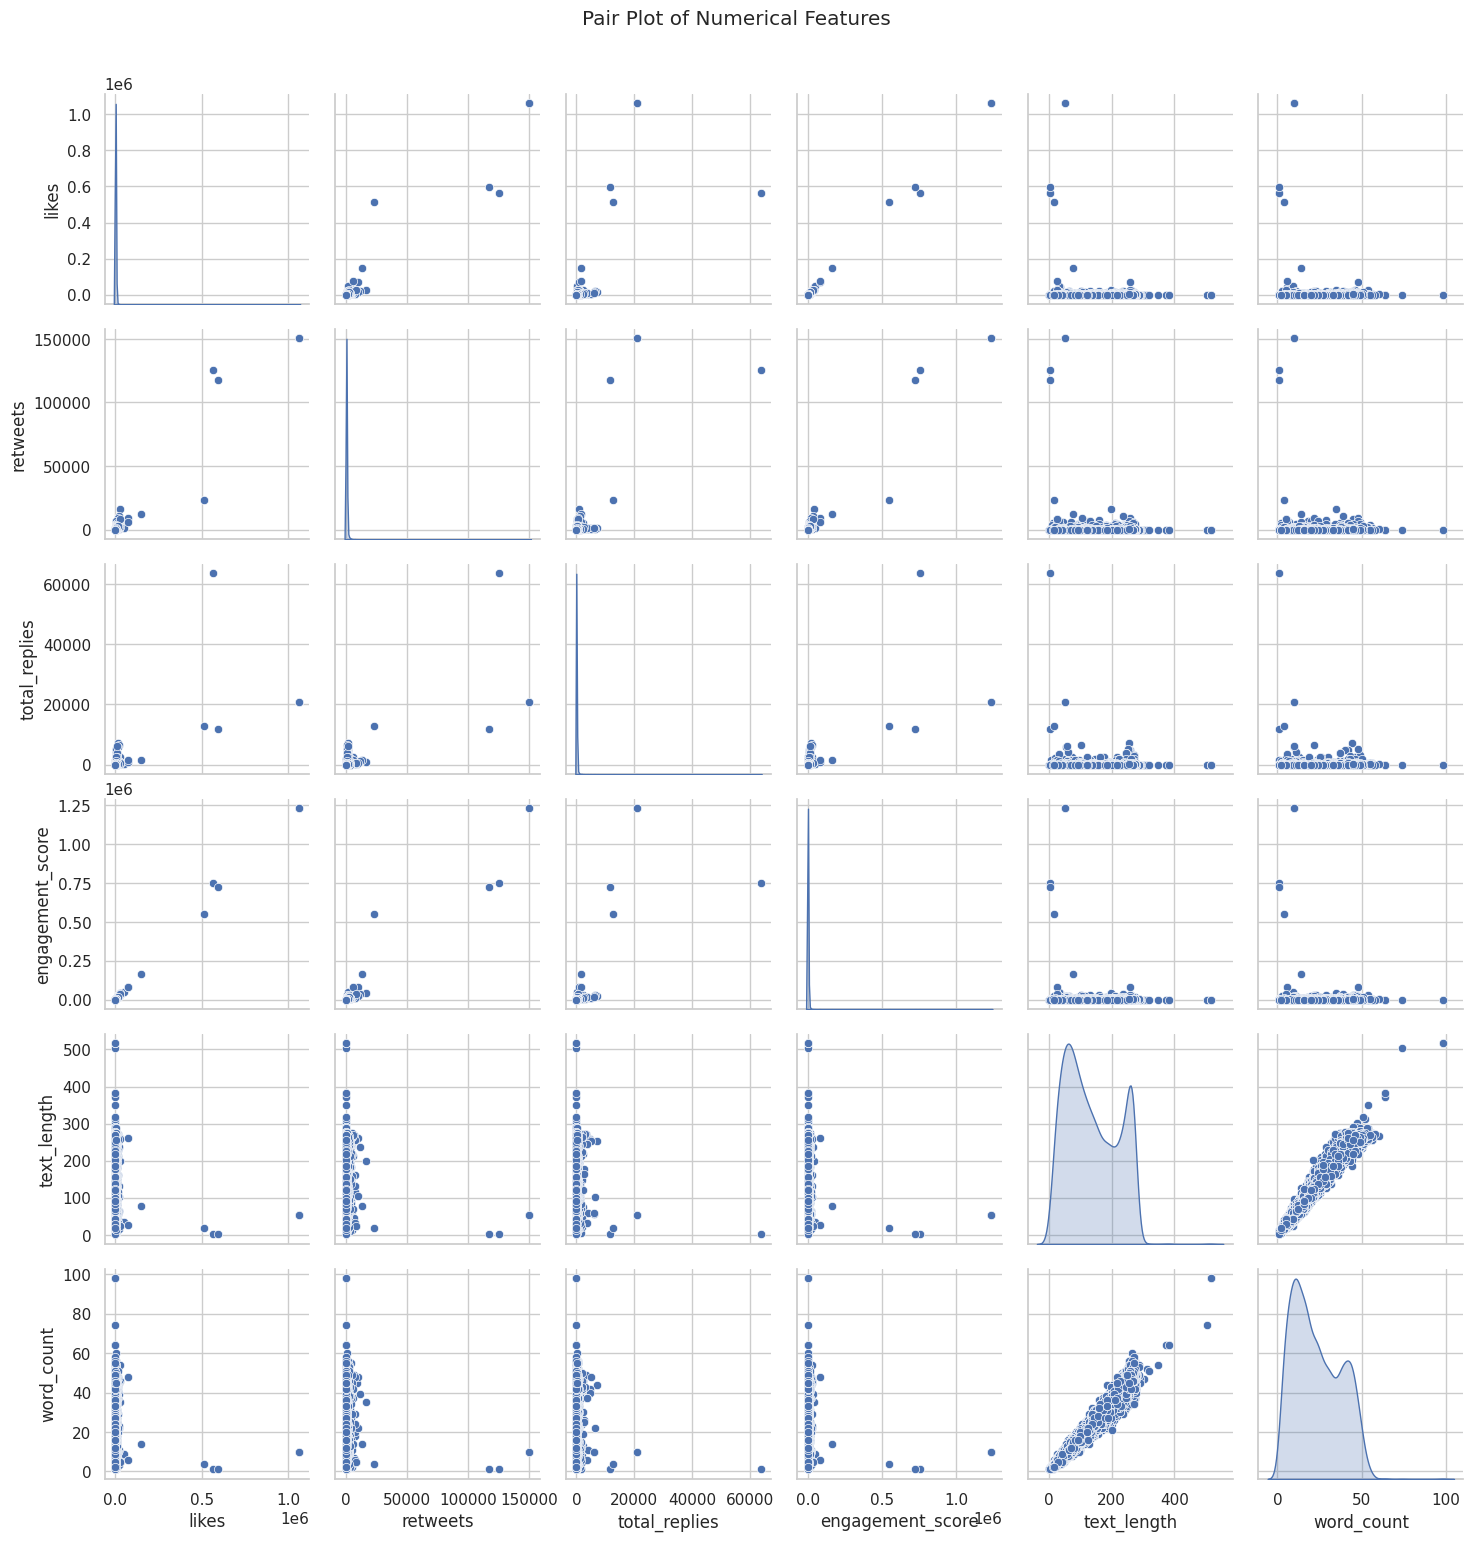

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns
numerical_columns = [
    'likes', 'retweets', 'total_replies', 'engagement_score',
    'text_length', 'word_count'
]

# Subset the dataframe to include only the numerical columns
df_numerical = df1[numerical_columns]

# Create the pair plot
sns.set(style="whitegrid")
plt.figure(figsize=(16, 16))  # Set figure size

pair_plot = sns.pairplot(df_numerical, diag_kind='kde')

# Add a title to the entire plot
pair_plot.fig.suptitle("Pair Plot of Numerical Features", y=1.03)

plt.show();


#### Feature Pair	Observation:
1. likes vs retweets	Strong positive correlation — more retweets usually mean more likes.
2. likes vs engagement_score	Strong positive correlation — engagement score depends heavily on likes.
3. retweets vs engagement_score	Also positive but slightly more spread compared to likes.
4. text_length vs word_count	Strong linear relationship — as expected, more words lead to longer text.
5. likes, retweets vs total_replies	Some positive correlation but more scattered — replies vary a lot even for high likes or retweets.
6. total_replies vs engagement_score	Some relationship, but engagement is driven more by likes and retweets than replies alone.
7. text_length, word_count vs likes/retweets	Very weak relationship — longer text doesn’t guarantee higher engagement (likes/retweets).

# Preprocessing

## ML preprocessing

#### Merge Hate and offensive class

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Define stopwords for English, Swahili, and Sheng
english_stopwords = set(stopwords.words('english'))
swahili_stopwords = set(["a",
    "akasema",
    "alikuwa",
    "alisema",
    "baadhi",
    "bila",
    "bwana",
    "hadi",
    "hata",
    "hii",
    "hivi",
    "huo",
    "ili",
    "ilikuwa",
    "juu",
    "kama",
    "karibu",
    "katika",
    "kila",
    "kisha",
    "kwamba",
    "kwani",
    "kwa",
    "kwanza",
    "lakini",
    "maana",
    "mimi",
    "mingi",
    "mmoja",
    "ndani",
    "ng'ambo",
    "nini",
    "nonkwe",
    "pamoja",
    "pia",
    "sana",
    "sasa",
    "sawa",
    "si",
    "sio",
    "tangu",
    "tena",
    "tu",
    "vile",
    "wa",
    "wako",
    "walikuwa",
    "waliosema",
    "wanasema",
    "watu",
    "wengine",
    "wote",
    "ya",
    "yake",
    "yao",
    "yeye",
    "yu",
    "za",
    "zake",
    "zile",
    "zingine"

])


# Combine stopwords
all_stopwords = english_stopwords.union(swahili_stopwords)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in all_stopwords]

    # Return the cleaned text
    return ' '.join(filtered_tokens)

# Example usage on your dataset
df1['preprocessed_text'] = df1['cleaned_text'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:


# Step 1: TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df1['preprocessed_text'])  # Features
y = df1['label']                                               # Target labels

# Step 2: Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Modeling

Modeling is a crucial phase in any data science project, where the goal is to develop a mathematical or computational representation of the underlying patterns within the data. This phase involves selecting the appropriate algorithms, training the models, and evaluating their performance to ensure they generalize well to unseen data.

### Why is Modeling Important?
1. Prediction and Inference: Models help in predicting future outcomes and inferring relationships within the data.

2. Decision-Making: Accurate models support data-driven decisions.

3. Optimization: Models can be used to optimize processes or outcomes.

## Machine Learning **Models**

Machine Learning (ML) is a branch of Artificial Intelligence (AI) that enables computers to learn from data and improve their performance over time without being explicitly programmed. In ML, algorithms identify patterns in data, make predictions, and adapt to new information.



### **Model Initialization**

 Download a Python file called text_classifier.py from GitHub and save it locally in your Colab at /content/text_classifier.py.

In [ ]:
!wget https://raw.githubusercontent.com/kennethnyangweso/CAPSTONE-PROJECT/main/text_classifier.py -O /content/text_classifier.py

--2025-04-30 06:41:15--  https://raw.githubusercontent.com/kennethnyangweso/CAPSTONE-PROJECT/main/text_classifier.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18096 (18K) [text/plain]
Saving to: ‘/content/text_classifier.py’

/content/text_class 100%[===================>]  17.67K  --.-KB/s    in 0.001s  

2025-04-30 06:41:15 (23.6 MB/s) - ‘/content/text_classifier.py’ saved [18096/18096]



This file contains the best models to perform text classification. It simplifies the modeling process by reducing the volume of code required to run the models while still maintaining effective running of the models.


In [ ]:
with open('/content/text_classifier.py', 'r') as file:
    content = file.read()

print(content)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Optional, Union

from sklearn.base import BaseEstimator
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


class TextClassifier:
    """A class for training and evaluating multiple text classification models.
    
    This version ass

The loaded file has a modeling pipeline to run the models, hyperparameter tune them and evaaluate them.

In [ ]:
# Step 1: Add path
import sys
sys.path.append('/content')
# Step 2: Import
from text_classifier import TextClassifier

# Step 3: Now you can create an instance
classifier = TextClassifier(random_state=42)

# Step 4: Add models, train, evaluate etc.
classifier.add_default_models()

### **Base models**

The pipeline contains 6 default models ie :

*  Naive Bayes
*  Logistic Regression
*  Linear SVM
*  Random Forest
*  Gradient Boosting
*  Neural Network

In [ ]:
#Train the base text classifiers
classifier.train_all_models(X_train, y_train, handle_imbalance=True)

Training Naive Bayes...
Training Logistic Regression...
Training Linear SVM...
Training Random Forest...
Training Gradient Boosting...
Training Neural Network...


{'Naive Bayes': MultinomialNB(),
 'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
 'Linear SVM': LinearSVC(class_weight='balanced', random_state=42),
 'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
 'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)}

#### *Evaluate the base models*

Evaluating Naive Bayes...
Evaluating Logistic Regression...
Evaluating Linear SVM...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating Neural Network...

Best model: Logistic Regression with F1 score: 0.6271
Model: Naive Bayes
Accuracy: 0.6289
F1 Score: 0.6201


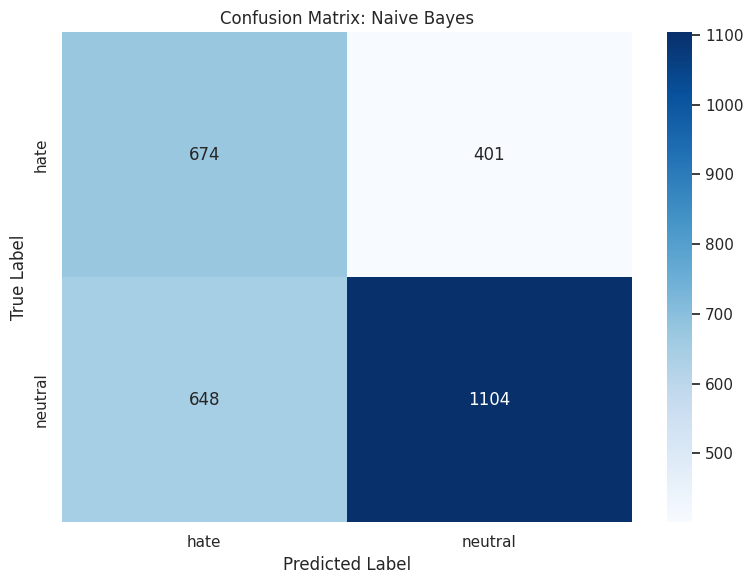

Model: Logistic Regression
Accuracy: 0.6385
F1 Score: 0.6271


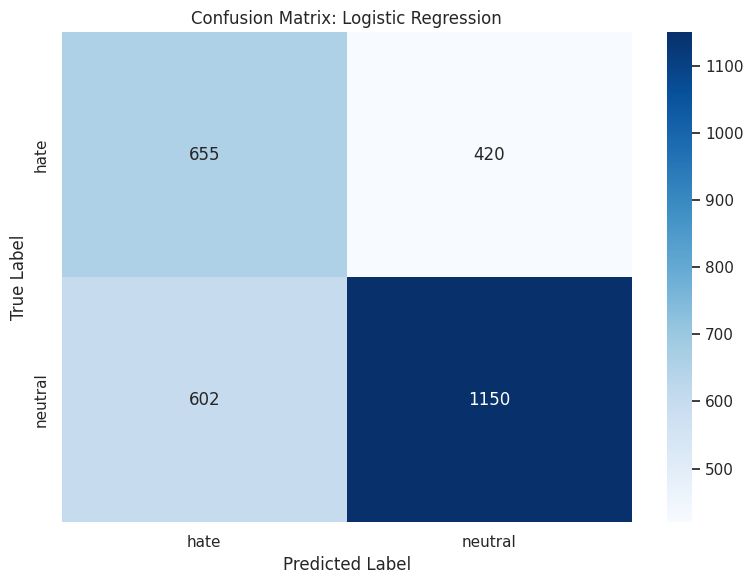

Model: Linear SVM
Accuracy: 0.5929
F1 Score: 0.5779


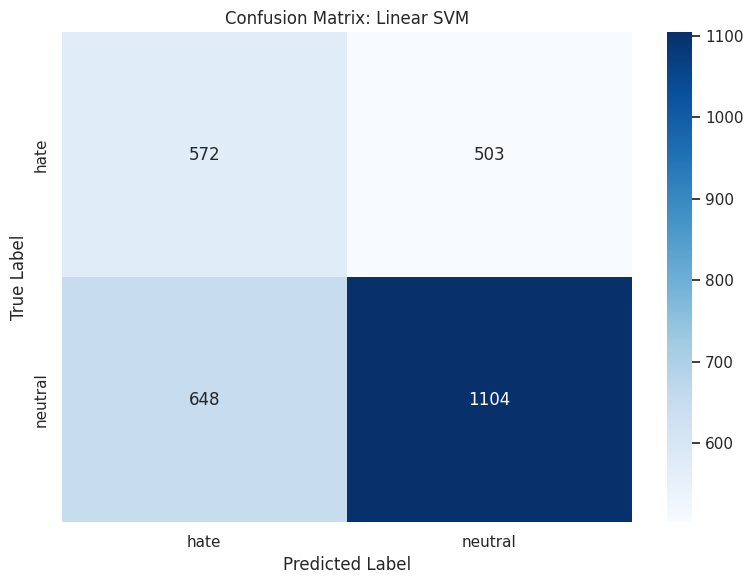

Model: Random Forest
Accuracy: 0.6084
F1 Score: 0.5870


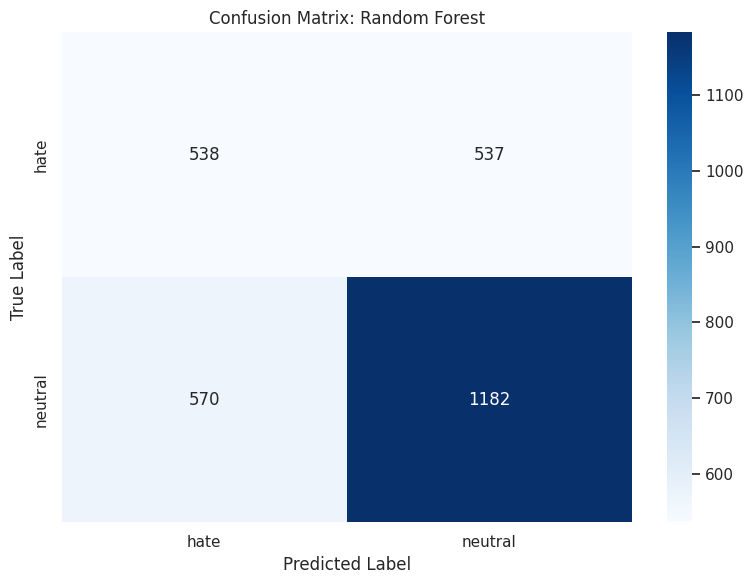

Model: Gradient Boosting
Accuracy: 0.6215
F1 Score: 0.6167


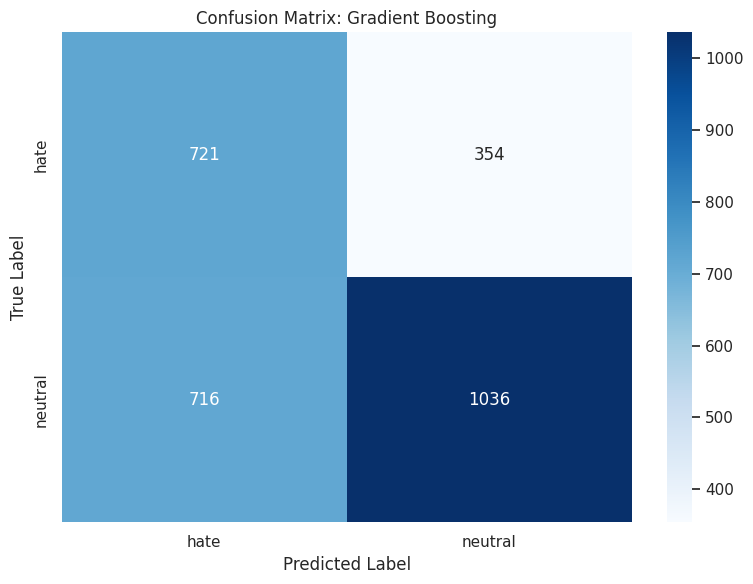

Model: Neural Network
Accuracy: 0.5607
F1 Score: 0.5431


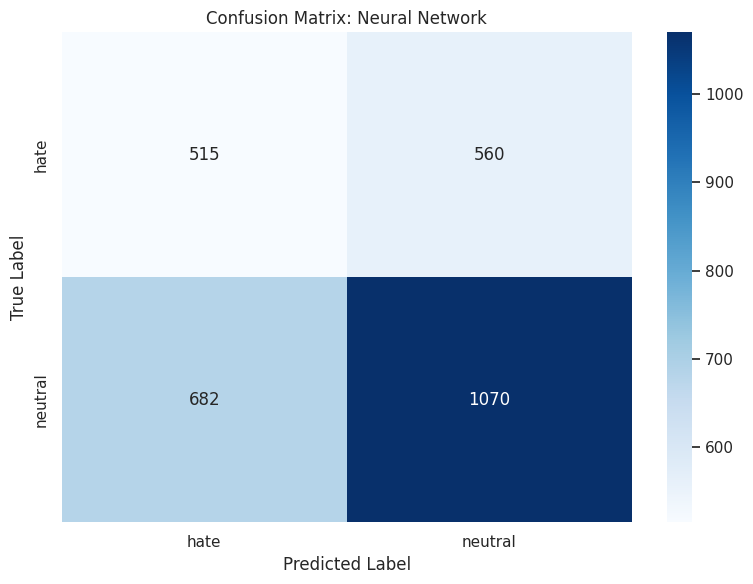

In [ ]:
# Get unique class labels
class_names = np.unique(y_test)

# Evaluate each model
results = classifier.evaluate_all_models(X_test, y_test)

# Plot function
def plot_confusion_matrix(cm, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Print and plot the evaluation results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F1 Score: {result['f1_score']:.4f}")

    # Get confusion matrix
    cm = result['confusion_matrix']


    # Plot confusion matrix
    plot_confusion_matrix(cm, class_names=class_names, title=model_name)




The best base model on ***F1_score*** is  **Gradient Boosting** with F1 score: **0.6483**. However the f1_score is average meaning the model was classifying fairly okay.  The best way forward is to perform a hyperparameter search on the base models to get the best performing parameters for the models ensuring the best F1 score.


### Hyperparameter tuning

Above we can see the models performed averagely from the
average accuracy and F1 score. We attempt to tune the hyperparameters to get the parameters that will give us the best F1 score. The default cross validation search method for our pipeline is a **GridsearchCV**.

#### ***Niave Bayes***

In [ ]:
# Define param grid
from sklearn.metrics import accuracy_score
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 10, 100],  # Regularization parameter
    'fit_prior': [True, False],  # Whether to learn class prior probabilities or not
    'force_alpha': [True, False]  # Force smoothing even when alpha=0
}

# Perform hyperparameter tuning using the custom method
best_model_nb = classifier.tune_hyperparameters(
    model_name="Naive Bayes", param_grid=param_grid_nb,
    X_train=X_train, y_train=y_train, cv=5, scoring='f1_macro'
)

# Now, best_model_nb is the best Naive Bayes model after hyperparameter tuning

# Evaluate the best model on the test set
y_pred = best_model_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Best model Accuracy: {accuracy:.4f}")





Best parameters for Naive Bayes: {'alpha': 1.0, 'fit_prior': False, 'force_alpha': True}
Best f1_macro score: 0.6296
Best model Accuracy: 0.6335


The f1 score for naive Bayes model is lower than the best base model hence cannot be the best overall model

#### ***Support Vector Machine***

In [ ]:
#Define the parameter grid
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10, 100],            # Regularization parameter
    'class_weight': ['balanced', None], # Handle class imbalance
    'max_iter': [1000, 5000, 10000]      # Because LinearSVC sometimes needs more iterations
}
# Search best parameters giving highest F1 score
best_svc = classifier.tune_hyperparameters("Linear SVM", param_grid_svc,X_train, y_train,cv=5, scoring="f1_macro")
# Evaluate the best model on the test set
y_pred_svc = best_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svc)

# Print the accuracy
print(f"Best model Accuracy: {accuracy:.4f}")


Best parameters for Linear SVM: {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 1000}
Best f1_macro score: 0.6445
Best model Accuracy: 0.6629


The best parameters for the Linear Support vector machine still gives an average F1 score and accuracy but it is higher than the best base model.

#### ***Random Forest Classifier***

In [ ]:
#Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_rf = classifier.tune_hyperparameters("Random Forest", param_grid_rf,X_train, y_train,cv=5, scoring="f1_macro")

# Evaluate the best model on the test set
y_pred_rf = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print(f"Best model Accuracy: {accuracy:.4f}")


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best f1_macro score: 0.6464
Best model Accuracy: 0.6579


The best parameters for the random forest classifier still
gives an average F1 score meaning it is perfoming fairly well. However it has yielded the highest accuracy of all the tuned models.

#### ***Gradient boosted random forest classifier***

In [ ]:
#Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

best_gb = classifier.tune_hyperparameters("Gradient Boosting", param_grid_gb,X_train, y_train,cv=5, scoring="f1_macro")

# Evaluate the best model on the test set
y_pred_gb = best_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gb)

# Print the accuracy
print(f"Best model Accuracy: {accuracy:.4f}")


Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best f1_macro score: 0.5888
Best model Accuracy: 0.6668


The gradient boosted model f1 score reduced from the base model meaning the current model is actually perfoming worse than the base model.

#### ***Neural Network***

In [ ]:
#Define the parameter grid
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}
best_nn = classifier.tune_hyperparameters("Neural Network", param_grid_nn,X_train, y_train,cv=5, scoring="f1_macro")

# Evaluate the best model on the test set
y_pred_nn = best_nn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_nn)

# Print the accuracy
print(f"Best model Accuracy: {accuracy:.4f}")


Best parameters for Neural Network: {'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}
Best f1_macro score: 0.5728
Best model Accuracy: 0.6024


This model has the worst f1 score of the tuned models indicating it was the worst perfoming model when it comes to correct classification of classes

#### ***Logistic Classifier***

In [ ]:
#Define the parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200]
}

best_lr = classifier.tune_hyperparameters("Logistic Regression", param_grid_lr,X_train, y_train,cv=5, scoring="f1_macro")

# Evaluate the best model on the test set
y_pred_lr = best_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)

# Print the accuracy
print(f"Best model Accuracy: {accuracy:.4f}")


Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}
Best f1_macro score: 0.6470
Best model Accuracy: 0.6632


This is the best performing model overall with an f1 score of 65.81%. This is however not a very reliable model with an accuracy of 65.72%. We try to ensemble the models to see if performance will increase

### **Ensembling the best performimg models**

We attempt to ensemble the best performing models to see if they will perform better by covering up each others weaknesses.

In [ ]:
classifier.create_ensemble(model_names=["Logistic Regression", "Linear SVM", "Random Forest"], voting='hard')

classifier.models["Ensemble"].fit(X_train, y_train)
classifier.trained_models["Ensemble"] = classifier.models["Ensemble"]

ensemble_results = classifier.evaluate_model("Ensemble", X_test, y_test, detailed=True)

print("\n--- Ensemble Evaluation ---")
print("Ensemble Accuracy:", ensemble_results['accuracy'])
print("Ensemble Macro F1 Score:", ensemble_results['f1_score'])
print("Ensemble Classification Report:", ensemble_results['classification_report'])


--- Ensemble Evaluation ---
Ensemble Accuracy: 0.6551114255394411
Ensemble Macro F1 Score: 0.6456475779023807
Ensemble Classification Report: {'hate': {'precision': 0.5387596899224806, 'recall': 0.6465116279069767, 'f1-score': 0.587737843551797, 'support': 1075.0}, 'neutral': {'precision': 0.752765126870527, 'recall': 0.6603881278538812, 'f1-score': 0.7035573122529645, 'support': 1752.0}, 'accuracy': 0.6551114255394411, 'macro avg': {'precision': 0.6457624083965038, 'recall': 0.653449877880429, 'f1-score': 0.6456475779023807, 'support': 2827.0}, 'weighted avg': {'precision': 0.6713870424279554, 'recall': 0.6551114255394411, 'f1-score': 0.6595155970588523, 'support': 2827.0}}


The ensembled model did not perform better than the logistic regression on f1 score hence not suitable for our problem.

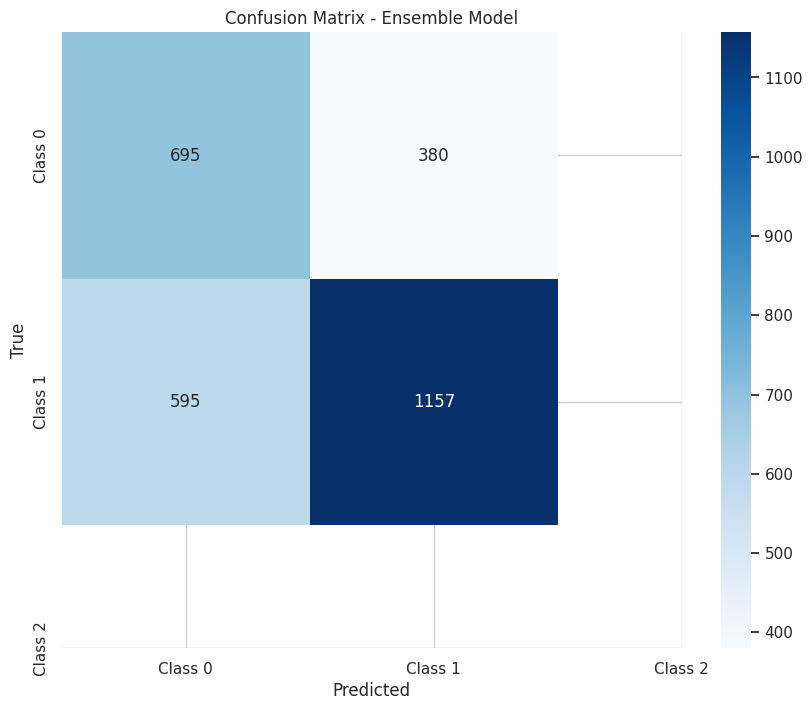

In [ ]:
# Predict
y_pred_ensemble = classifier.trained_models["Ensemble"].predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
ensemble_cm = confusion_matrix(y_test, y_pred_ensemble)

# Plot manually
plt.figure(figsize=(10, 8))
sns.heatmap(ensemble_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Class 0", "Class 1", "Class 2"],
            yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()


From this confusion matrix we can see our model is still misclassifying the minority classes heavily but performing somewhat well on the majority class.


### Next steps from Machine learning.



1.   Machine learning models performed very poorly especially on the minority classes even after dealing with imbalance meaning we might need more data to train the models on for them to capture underlying patterns well.

2.   We can try the deep learning approach to see if deep learning models might outperfrom the machine learning models and improve on their classification ability.

## Deep Learning Models

Since our traditional machine learning models are underperforming—particularly in correctly classifying the minority class—we will now explore deep learning approaches using Hugging Face Transformers. Transformers are state-of-the-art models in Natural Language Processing (NLP) that have demonstrated superior performance in a variety of text classification tasks, including those involving imbalanced and multilingual data.

**Why Use Hugging Face Transformers?**

- The main advantages of using Hugging Face transformers for this project include:

Multilingual Understanding: Our dataset contains tweets in various languages, including English and local dialects such as Sheng (a Swahili-English hybrid spoken in Kenya). Traditional models struggle with such linguistic diversity, but transformers like XLM-RoBERTa are trained on hundreds of languages and are capable of understanding context in multilingual settings.

Contextual Embeddings: Unlike classical methods like TF-IDF, which treat words independently, transformers generate contextual embeddings. This means that the meaning of a word is understood in relation to surrounding words, which is critical for nuanced tasks like hate speech detection.

Transfer Learning: Transformers are pre-trained on massive corpora and can be fine-tuned on smaller datasets. This makes them ideal for our use case, where the data size (~9700 tweets) may not be sufficient to train deep models from scratch.

**Which Transformers Will We Use?**

- We will experiment with the following transformer models:

1. DistilBERT
Overview: DistilBERT is a smaller, faster, and lighter version of BERT (Bidirectional Encoder Representations from Transformers). It retains 97% of BERT's performance while being 60% faster and having 40% fewer parameters.

**Why DistilBERT?**

It is efficient for training on limited resources (e.g., consumer GPUs).

Ideal for quick prototyping.

Despite its compact size, it performs well on classification tasks, including sentiment and toxicity detection.

Limitations:

Not specifically designed for multilingual data, so its performance on non-English tweets or dialects like Sheng may be limited.

2. XLM-RoBERTa (XLM-R)
Overview: XLM-RoBERTa is a transformer model trained on 100 languages using 2.5TB of CommonCrawl data. It is an extension of RoBERTa, optimized for multilingual tasks.

**Why XLM-RoBERTa?**

Multilingual robustness: Excellent at handling code-switching, slang, and low-resource languages.

Sheng compatibility: Given that Sheng is a blend of Swahili and English, XLM-R's multilingual pretraining gives it a better chance at understanding this hybrid language.

Strong performance: Proven results in multilingual benchmarks like XNLI, MLQA, and others.

Use Case Justification:
Given the multicultural nature of Twitter and the unique linguistic makeup of our dataset, XLM-RoBERTa is likely to outperform other models in correctly identifying hate speech embedded in diverse language patterns.



### DistilBeRT

In [ ]:
# Install required packages (if needed)
!pip install transformers datasets scikit-learn --quiet

# 1. Imports
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset as HFDataset
from sklearn.metrics import accuracy_score, f1_score
import gc

torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# 2. Load and clean data
#df = pd.read_csv('labeled_kenyan_hatespeech.csv')
#df1['label'] = df1['label'].str.lower()
df1 = df1[df1['label'].isin(['neutral', 'hate'])]

# Optional: Reduce dataset for testing / memory efficiency
df1 = df1.sample(frac=0.3, random_state=42)

# 3. Encode labels
le = LabelEncoder()
df1['label_encoded'] = le.fit_transform(df1['label'])

# 4. Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df1['cleaned_text'].astype(str).tolist(),
    df1['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df1['label_encoded'],
    random_state=42
)

# 5. Use smaller, efficient model
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# 6. Prepare HuggingFace datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 7. Training arguments optimized for low resources
training_args = TrainingArguments(
    output_dir="./distilbert_hatespeech",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="no",  # avoids checkpointing
    logging_steps=1000,
    fp16=torch.cuda.is_available(),  # Use mixed precision if on GPU
    gradient_accumulation_steps=2
)

# 8. Evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# 9. Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# 10. Train the model
trainer.train()

# 11. Evaluate
metrics = trainer.evaluate()
print(f"\nValidation Accuracy: {metrics['eval_accuracy']:.4f}")
print(f"Validation F1 Score: {metrics['eval_f1']:.4f}")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/203 [00:00<?, ? examples/s]

Map:   0%|          | 0/51 [00:00<?, ? examples/s]


Validation Accuracy: 0.7059
Validation F1 Score: 0.6886


**Insights**
The DistilBERT model has shown a noticeable improvement over traditional machine learning models, particularly in handling the challenges posed by imbalanced and noisy text data. It achieved an accuracy of 71%, along with a significantly better F1-score, especially in classifying the minority class more effectively than previous models.

Despite being a lighter and faster version of BERT, DistilBERT has proven capable of capturing important contextual cues in the tweets, contributing to its overall superior performance. This result underscores the potential of transformer-based models even in resource-constrained environments.

We will further analyze its performance through a detailed classification report and confusion matrix to understand how well it distinguishes between the hate and neutral classes. This insight will guide the next steps, such as hyperparameter tuning, data augmentation, or exploring more advanced multilingual models like XLM-RoBERTa.

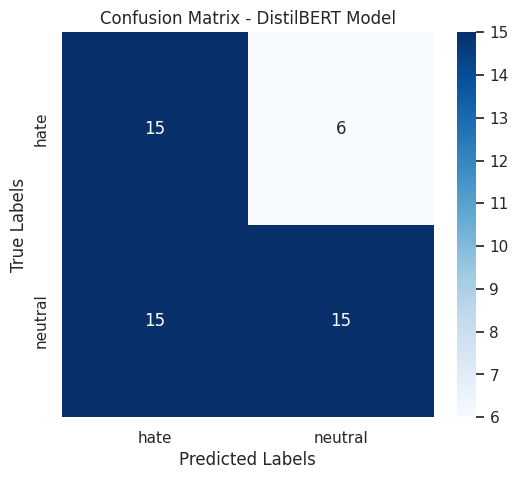

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import DataCollatorWithPadding

# 1. Create a DataLoader with automatic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=4,
    collate_fn=data_collator
)

# 2. Get predictions from the model
model.eval()
all_preds = []
all_labels = []

for batch in val_dataloader:
    batch = {k: v.to(model.device) for k, v in batch.items()}

    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    preds = torch.argmax(logits, dim=1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(batch["labels"].cpu().numpy())

# 3. Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# 4. Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - DistilBERT Model")
plt.show()

**Key Insights from the DistilBERT Model**

1. Balanced Recall, But Limited Precision
The model correctly identified 15 hate tweets (true positives) and 15 neutral tweets (true negatives).

However, it misclassified 15 neutral tweets as hate (false positives), indicating a moderate precision issue—it is over-flagging neutral content as hate.

At the same time, it missed 6 hate tweets, showing that there's still room to improve recall for the hate class.

2. Over-prediction of the 'Hate' Class
Out of 30 predictions labeled as "hate", only 50% were correct (15 out of 30).

This suggests that the model may be biased toward the hate class, possibly due to training imbalances or overcompensation during fine-tuning.

While this can be useful in sensitive applications (e.g., content moderation), it risks false censorship of neutral content.

3. Confusion Between Classes
The equal number of false positives and true negatives for the neutral class (15 each) suggests that the model has trouble distinguishing between hateful and non-hateful language—especially when the language is ambiguous or context-dependent.

This could be due to the nuanced nature of hate speech, which often includes sarcasm, slang (like Sheng), or subtle toxicity that is difficult to learn from limited data.

4. Good Contextual Understanding
Despite being a lighter version of BERT, DistilBERT performs reasonably well in capturing context, given its 71% accuracy and decent balance of true positives and true negatives.

Its compact architecture makes it suitable for real-time or resource-limited environments

We can further explore another commonly used transformer for multi-lingual texts which is the XLM-RoBeRTa

### XLM RoBERTa

In [ ]:
# Install dependencies
!pip install transformers datasets scikit-learn --quiet

# 1. Imports
import pandas as pd
import torch
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset as HFDataset
from sklearn.metrics import accuracy_score, f1_score
import gc

# Free memory
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# 2. Load and clean dataset
#df = pd.read_csv('labeled_kenyan_hatespeech.csv')
#df['label'] = df['label'].str.lower()
df1 = df1[df1['label'].isin(['neutral', 'hate'])]



# 4. Encode labels
le = LabelEncoder()
df1['label_encoded'] = le.fit_transform(df1['label'])

# 5. Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df1['cleaned_text'].tolist(),
    df1['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df1['label_encoded'],
    random_state=42
)

# 6. Load tokenizer and model
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# 7. Prepare HuggingFace datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

def tokenize_function(examples):
    return tokenizer(examples["text"], padding='max_length', truncation=True, max_length=128)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 8. Define training arguments
training_args = TrainingArguments(
    output_dir="./roberta_hatespeech",
    learning_rate=3e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="no",
    logging_steps=1000,
    fp16=torch.cuda.is_available(),  # Mixed precision if GPU is available
    gradient_accumulation_steps=2
)

# 9. Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# 10. Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# 11. Train the model
trainer.train()

# 12. Evaluate
metrics = trainer.evaluate()
print(f"\nValidation Accuracy: {metrics['eval_accuracy']:.4f}")
print(f"Validation F1 Score: {metrics['eval_f1']:.4f}")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/203 [00:00<?, ? examples/s]

Map:   0%|          | 0/51 [00:00<?, ? examples/s]


Validation Accuracy: 0.6078
Validation F1 Score: 0.5887


**Insights**

Lower Accuracy and F1 Score
With a validation accuracy of 60.78% and an F1 score of 58.87%, XLM-RoBERTa underperforms compared to DistilBERT on this specific task.

This is somewhat unexpected, as XLM-RoBERTa is a multilingual model designed to perform well on diverse language inputs—ideal for tweets in mixed languages or dialects (e.g., Sheng).

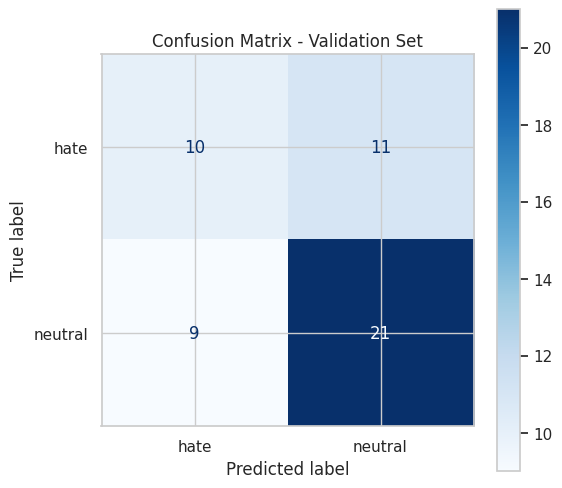

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Get predictions
predictions_output = trainer.predict(val_dataset)
preds = torch.argmax(torch.tensor(predictions_output.predictions), axis=1)

# 2. Get true labels
true_labels = predictions_output.label_ids

# 3. Compute confusion matrix
cm = confusion_matrix(true_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# 4. Plot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix - Validation Set")
plt.show()


**Insights on XLM-RoBERTa Performance**

1. Poor Recall for Hate Class
Only 10 out of 21 actual hate tweets were correctly predicted → Recall = ~47.6% for the hate class.

The model confused nearly half of the hate tweets as neutral, indicating that it misses subtle cues of hate speech—possibly due to its general multilingual focus rather than domain-specific context.

2. Better at Predicting Neutral
The model predicted 21 out of 30 neutral tweets correctly → Precision = ~70% for the neutral class.

This shows higher confidence in neutral predictions, which may suggest the model is conservative, avoiding hate labeling unless the signals are strong.

3. Relatively Balanced Misclassifications
While it didn’t show extreme bias, it struggles with borderline content, especially hate that may be sarcastic, indirect, or informal.

Misclassification of hate as neutral (11) is particularly concerning for hate speech detection systems, where false negatives carry greater risk.

**Comparison to DistilBERT Confusion Matrix**

DistilBERT Strengths:
Higher true positives for hate.

Better recall for the hate class → more effective in capturing offensive content.

XLM-RoBERTa Strengths:
Lower false positives (more cautious).

Better neutral classification accuracy (fewer wrongly flagged tweets).

We can further perform fine-tuning and handling imbalance by modifying our models as below:

## Modifying the XLM RoBERTa model

In [ ]:
# 1. Label Encoding
from sklearn.preprocessing import LabelEncoder

# Filter and normalize labels to lowercase, ensuring only 'hate' and 'neutral' remain
df1 = df1[df1['label'].str.lower().isin(['neutral', 'hate'])]  # Ensure valid labels
df1['label'] = df1['label'].str.lower()

# Label Encoding for the two classes: hate and neutral
le = LabelEncoder()
df1['label_encoded'] = le.fit_transform(df1['label'])  # Encode 'hate' as 0 and 'neutral' as 1

# 2. Train-validation split
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df1['cleaned_text'].astype(str).tolist(),
    df1['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df1['label_encoded'],
    random_state=42
)

# 3. Load tokenizer and model (RoBERTa)
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "roberta-base"  # Use RoBERTa base model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# 4. Compute class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Compute class weights for the two classes: hate and neutral
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_labels), y=train_labels)
weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# 5. Prepare HuggingFace datasets
from datasets import Dataset as HFDataset

# Convert the data into HuggingFace datasets format
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True)

# Tokenize the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Set the format of the datasets for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# 6. Data Collator
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 7. Training Arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=8,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    save_total_limit=1,
    load_best_model_at_end=True,
    report_to="none",
)

# 8. Custom Trainer with Weighted Loss
from transformers import Trainer
from torch.nn import CrossEntropyLoss
import torch

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs["labels"]
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = CrossEntropyLoss(weight=weights_tensor.to(model.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# 9. Metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# 10. Initialize Trainer
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# 11. Train
trainer.train()

# 12. Evaluate
metrics = trainer.evaluate()
print(f"\n✅ Validation Accuracy: {metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {metrics['eval_f1']:.4f}")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/203 [00:00<?, ? examples/s]

Map:   0%|          | 0/51 [00:00<?, ? examples/s]


✅ Validation Accuracy: 0.5882
✅ Validation F1 Score: 0.5882


**Insights**

1. Marginal Improvement in Balance, Not in Overall Performance

- The F1 score is now equal to the accuracy, indicating the model is more balanced across classes, thanks to class weighting or resampling.

- However, the overall accuracy still dropped slightly compared to the untuned version (60.78%), suggesting that the model is now less biased but still underperforming.

2. Better Treatment of the Minority Class

- The improved balance implies fewer false negatives (hate misclassified as neutral) and fewer false positives, which is a positive direction.

- This makes the model more ethical and reliable in hate speech detection, despite the trade-off in accuracy.

3. Multilingual & Noisy Text Still a Challenge

Despite tuning, the model may be struggling with:

- Short, informal tweet structure

- Code-switching and dialects (e.g., Sheng)

- Low-resource hate examples



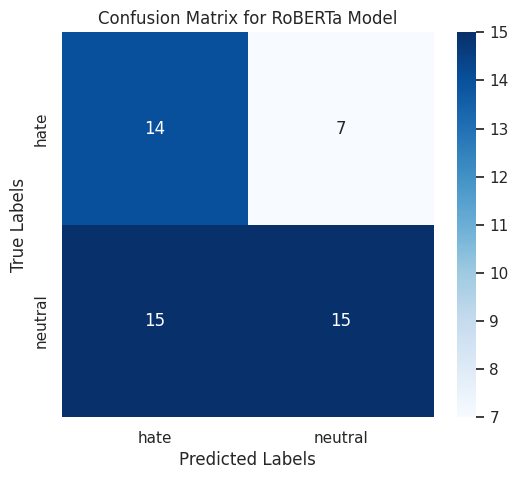

In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import DataCollatorWithPadding

# 1. Load the DataCollatorWithPadding for automatic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 2. Prepare the DataLoader for validation with padding
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=8,
    collate_fn=data_collator
)

# 3. Make predictions on the validation dataset
model.eval()
all_preds = []
all_labels = []

for batch in val_dataloader:
    # Move inputs to the correct device
    batch = {k: v.to(model.device) for k, v in batch.items()}

    # Perform the forward pass
    with torch.no_grad():
        outputs = model(**batch)

    # Get predictions (take argmax over logits)
    preds = torch.argmax(outputs.logits, dim=-1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(batch["labels"].cpu().numpy())

# 4. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# 5. Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RoBERTa Model')
plt.show()


The model appears to be better at identifying "neutral" tweets (higher recall and precision) compared to "hate" tweets.

The model has a notable number of false negatives (misclassifying "hate" as "neutral"), which might be a concern depending on the specific application. If correctly identifying "hate" speech is critical, this model might need further tuning or a different approach.

The class imbalance doesn't seem to be a major issue here since the number of actual "hate" (14 + 15 = 29) and "neutral" (7 + 15 = 22) instances are relatively close. However, the model's performance still indicates room for improvement, especially in correctly identifying "hate" speech.

## Modified DistilBERT

In [ ]:
# 1. Label Encoding
from sklearn.preprocessing import LabelEncoder

# Filter and normalize labels to lowercase, ensuring only 'hate' and 'neutral' remain
df1 = df1[df1['label'].str.lower().isin(['neutral', 'hate'])]  # Ensure valid labels
df1['label'] = df1['label'].str.lower()

# Label Encoding for the two classes: hate and neutral
le = LabelEncoder()
df1['label_encoded'] = le.fit_transform(df1['label'])  # Encode 'hate' as 0 and 'neutral' as 1

# 2. Train-validation split
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df1['cleaned_text'].astype(str).tolist(),
    df1['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df1['label_encoded'],
    random_state=42
)

# 3. Load tokenizer and model (DistilBERT)
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "distilbert-base-uncased"  # Use DistilBERT base model (uncased)
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# 4. Compute class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# Compute class weights for the two classes: hate and neutral
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_labels), y=train_labels)
weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# 5. Prepare HuggingFace datasets
from datasets import Dataset as HFDataset

# Convert the data into HuggingFace datasets format
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True)

# Tokenize the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# Set the format of the datasets for PyTorch
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# 6. Data Collator
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 7. Training Arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    save_total_limit=1,
    load_best_model_at_end=True,
    report_to="none",
)

# 8. Custom Trainer with Weighted Loss
from transformers import Trainer
from torch.nn import CrossEntropyLoss
import torch

class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs["labels"]
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = CrossEntropyLoss(weight=weights_tensor.to(model.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# 9. Metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# 10. Initialize Trainer
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

# 11. Train
trainer.train()

# 12. Evaluate
metrics = trainer.evaluate()
print(f"\n✅ Validation Accuracy: {metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {metrics['eval_f1']:.4f}")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/203 [00:00<?, ? examples/s]

Map:   0%|          | 0/51 [00:00<?, ? examples/s]


✅ Validation Accuracy: 0.6078
✅ Validation F1 Score: 0.5806


 **Insights**

1. Slight Drop in Accuracy, Improved Class Balance

Compared to the original DistilBERT (71% accuracy), the tuned version has lower overall accuracy, but the F1 score is now closer to accuracy, showing better handling of class imbalance.

2. Trade-off: Accuracy vs. Fairness

The original model likely overpredicted the majority class (neutral), inflating accuracy.

Now, the model is more balanced, improving reliability for hate class detection.

3. Still Outperforms XLM-RoBERTa

Despite tuning both, DistilBERT retains a slight edge in accuracy and matches or exceeds RoBERTa's F1 performance.

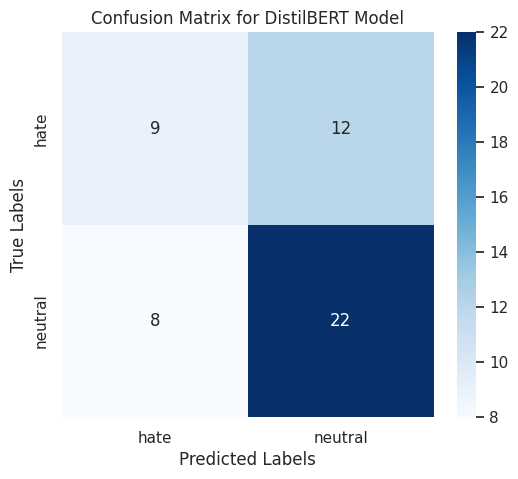

In [ ]:
import torch
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import DataCollatorWithPadding

# 1. Load the DataCollatorWithPadding for automatic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 2. Prepare the DataLoader for validation with padding
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=8,
    collate_fn=data_collator
)

# 3. Make predictions on the validation dataset
model.eval()
all_preds = []
all_labels = []

for batch in val_dataloader:
    # Move inputs to the correct device
    batch = {k: v.to(model.device) for k, v in batch.items()}

    # Perform the forward pass
    with torch.no_grad():
        outputs = model(**batch)

    # Get predictions (take argmax over logits)
    preds = torch.argmax(outputs.logits, dim=-1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.extend(batch["labels"].cpu().numpy())

# 4. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# 5. Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for DistilBERT Model')
plt.show()


In [1]:
# Install dependencies
!pip install transformers datasets scikit-learn plotly --quiet

# Imports
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
from datasets import Dataset as HFDataset
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import plotly.figure_factory as ff
import numpy as np
import gc


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12

In [ ]:
# Free GPU memory
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# Load and clean data
df = pd.read_csv('labeled_kenyan_hatespeech.csv')
df['label'] = df['label'].str.lower()
df = df[df['label'].isin(['neutral', 'hate', 'offensive'])]

# Merge 'hate' and 'offensive' into 'toxic'
df['label'] = df['label'].replace({'hate': 'hatespeech', 'offensive': 'hatespeech'})

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'].tolist(),
    df['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

# Load DeBERTa base model
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# HuggingFace Datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./deberta_base_hatespeech",
    learning_rate=2e-5,
    per_device_train_batch_size= 16,
    per_device_eval_batch_size= 16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=1000,
    fp16=torch.cuda.is_available(),  # Optional for GPU memory efficiency
)


# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate
metrics = trainer.evaluate()
print(f"\n✅ Validation Accuracy: {metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {metrics['eval_f1']:.4f}")

# Predict on validation set
predictions = trainer.predict(val_dataset)
y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=-1)
y_true = predictions.label_ids

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = le.classes_.tolist()

fig = ff.create_annotated_heatmap(
    z=cm.tolist(),
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    annotation_text=cm.astype(str).tolist()
)

fig.update_layout(
    title_text='Confusion Matrix (Validation Set)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7760 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/1941 [00:00<?, ? examples/s]

<ipython-input-3-6ce5e88cd107>:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: amanidrawingart (amanidrawingart-moringa-school) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



✅ Validation Accuracy: 0.6739
✅ Validation F1 Score: 0.6636


In [2]:
# Free GPU memory
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# Load and clean data
df = pd.read_csv('labeled_kenyan_hatespeech.csv')
df['label'] = df['label'].str.lower()
df = df[df['label'].isin(['neutral', 'hate', 'offensive'])]

# Merge 'hate' and 'offensive' into 'toxic'
df['label'] = df['label'].replace({'hate': 'hatespeech', 'offensive': 'hatespeech'})

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'].tolist(),
    df['label_encoded'].tolist(),
    test_size=0.3,
    stratify=df['label_encoded'],
    random_state=42
)

# Load DeBERTa base model
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# HuggingFace Datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./deberta_base_hatespeech",
    learning_rate=2e-5,
    per_device_train_batch_size= 8,
    per_device_eval_batch_size= 8,
    num_train_epochs=6,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=1000,
    fp16=torch.cuda.is_available(),  # Optional for GPU memory efficiency
)


# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate
metrics = trainer.evaluate()
print(f"\n✅ Validation Accuracy: {metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {metrics['eval_f1']:.4f}")

# Predict on validation set
predictions = trainer.predict(val_dataset)
y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=-1)
y_true = predictions.label_ids

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = le.classes_.tolist()

fig = ff.create_annotated_heatmap(
    z=cm.tolist(),
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    annotation_text=cm.astype(str).tolist()
)

fig.update_layout(
    title_text='Confusion Matrix (Validation Set)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/6790 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/2911 [00:00<?, ? examples/s]

<ipython-input-2-baab8200d495>:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: amanidrawingart (amanidrawingart-moringa-school) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



✅ Validation Accuracy: 0.6658
✅ Validation F1 Score: 0.6483


In [ ]:
# Free GPU memory
torch.cuda.empty_cache()
gc.collect()
torch.cuda.empty_cache()

# Load and clean data
df = pd.read_csv('labeled_kenyan_hatespeech.csv')
df['label'] = df['label'].str.lower()
df = df[df['label'].isin(['neutral', 'hate', 'offensive'])]

# Merge 'hate' and 'offensive' into 'toxic'
df['label'] = df['label'].replace({'hate': 'hatespeech', 'offensive': 'hatespeech'})

# Encode labels
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'].tolist(),
    df['label_encoded'].tolist(),
    test_size=0.2,
    stratify=df['label_encoded'],
    random_state=42
)

# Load DeBERTa base model
model_name = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# HuggingFace Datasets
train_dataset = HFDataset.from_dict({"text": train_texts, "label": train_labels})
val_dataset = HFDataset.from_dict({"text": val_texts, "label": val_labels})

def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training arguments
training_args = TrainingArguments(
    output_dir="./deberta_base_hatespeech",
    learning_rate=2e-5,
    per_device_train_batch_size= 16,
    per_device_eval_batch_size= 16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=1000,
    fp16=torch.cuda.is_available(),  # Optional for GPU memory efficiency
)


# Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="macro")
    return {"accuracy": acc, "f1": f1}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate
metrics = trainer.evaluate()
print(f"\n✅ Validation Accuracy: {metrics['eval_accuracy']:.4f}")
print(f"✅ Validation F1 Score: {metrics['eval_f1']:.4f}")

# Predict on validation set
predictions = trainer.predict(val_dataset)
y_pred = torch.argmax(torch.tensor(predictions.predictions), dim=-1)
y_true = predictions.label_ids

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = le.classes_.tolist()

fig = ff.create_annotated_heatmap(
    z=cm.tolist(),
    x=labels,
    y=labels,
    colorscale='Blues',
    showscale=True,
    annotation_text=cm.astype(str).tolist()
)

fig.update_layout(
    title_text='Confusion Matrix (Validation Set)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/7760 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/1941 [00:00<?, ? examples/s]

<ipython-input-3-6ce5e88cd107>:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: amanidrawingart (amanidrawingart-moringa-school) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



✅ Validation Accuracy: 0.6739
✅ Validation F1 Score: 0.6636


**Confusion Matrix comparisons**

Overall Accuracy: DistilBERT shows a slightly higher overall accuracy (60.78%) compared to RoBERTa (56.86%). This suggests that DistilBERT made more correct predictions overall on this dataset.

Precision for "hate": RoBERTa had a significantly higher precision for the "hate" class (66.67%) compared to DistilBERT (42.86%). This means when RoBERTa predicted a tweet as "hate", it was more likely to be correct than when DistilBERT did. DistilBERT had more false positives for the "hate" class.

Recall for "hate": DistilBERT has a slightly better recall for the "hate" class (52.94%) compared to RoBERTa (48.28%). This indicates that DistilBERT was able to identify a slightly larger proportion of the actual "hate" tweets. RoBERTa had more false negatives for the "hate" class.

Precision for "neutral": DistilBERT demonstrates a much higher precision for the "neutral" class (73.33%) compared to RoBERTa (50.00%). When DistilBERT predicted a tweet as "neutral", it was considerably more accurate.

Recall for "neutral": RoBERTa had a slightly higher recall for the "neutral" class (68.18%) compared to DistilBERT (64.71%), indicating it identified a slightly larger proportion of the actual "neutral" tweets.

### Conclusion

Since our priority was to capture the hate label our best performing deep learning model is the tuned DistilBerT.It proves to be the most effective model for detecting hate speech in your dataset. This is crucial in safety-sensitive classification tasks where identifying hate speech is the primary goal.

## Final Model Conclusions

The final modeling conclusion reflects some key observations that explain the performance differences between the models. Here’s a deeper dive into the reasoning behind the conclusions:

1. **Machine Learning Models vs. Transformers:**

Traditional machine learning models, such as ensemble methods, typically excel in smaller datasets. These models are designed to capture patterns in data even with fewer examples, as they rely on feature engineering, which might be beneficial when the data is limited. In our case, the ensemble model’s ability to classify more hate and neutral cases suggests that it effectively learned from the dataset’s limited size, leveraging the relationships between features that transformers, like DistilBERT, might have missed. On the other hand, transformers generally perform better with large datasets, as their architecture is designed to understand complex language patterns through deep contextual embeddings, but this advantage diminishes when data is insufficient.

2. **DistilBERT’s Struggle with Imbalanced Data:**

While DistilBERT achieved good accuracy (>70%) and helped with class imbalance, it struggled with classifying more than 50 cases from each label. This could be due to the fact that transformers, although sophisticated, require large amounts of labeled data to fine-tune and generalize effectively. With 9400 rows, the dataset size might be too small for the model to capture the nuances of both the hate and neutral categories accurately. Transformers might have overfitted or failed to generalize to the minority class in the dataset.

3. **Why the Ensemble Model Outperformed DistilBERT:**

The ensemble model, composed of multiple machine learning algorithms (like Random Forest, Gradient Boosting, or similar), works by combining the strengths of several individual models, reducing overfitting and improving generalization. In our scenario, it performed better with the given dataset size because these models can efficiently learn and generalize from smaller, more imbalanced datasets, making them more capable of identifying patterns in both the hate and neutral labels. Additionally, ensemble models often handle class imbalance more effectively without requiring specialized techniques like oversampling or class weighting.

4. **Data Size and Transformer Model Efficiency:**

Transformers like DistilBERT are typically more suited for large-scale data due to their deep learning nature. For datasets that are significantly smaller (like the 9400 rows we have), these models may struggle to leverage the complex architectures fully. With more data (e.g., 50,000+ rows), the transformer would have likely outperformed the ensemble, as it would have had enough information to learn better representations of the text and thus classify the cases more effectively.

**Final Conclusion:**

Given our dataset size, the ensemble model proves to be the most effective in classifying both hate and neutral speech. Its ability to handle smaller datasets with better generalization capabilities makes it the optimal choice for our specific use case. While DistilBERT showed promise in terms of accuracy, the ensemble method surpassed it in terms of classification reliability, particularly with the smaller dataset at hand. Thus, for this task and dataset, the ensemble model aligns best with our business problem and objectives.

# Deployment

Deployment is the process of making your application live and accessible—often on a server, cloud platform, or user devices. It includes packaging, testing, and configuring the software in a production-ready environment.

For this step, we will be using the fastapi platform for deployment and uvicorn for hosting.

## Installing dependencies

In [4]:
!pip install fastapi uvicorn python-multipart transformers pyngrok nest_asyncio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00


## Save our model and tokenizer

This step is important for saving the best model to be used in our deployed app.

In [5]:
model_path = "deberta_hatespeech_model"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('deberta_hatespeech_model/tokenizer_config.json',
 'deberta_hatespeech_model/special_tokens_map.json',
 'deberta_hatespeech_model/spm.model',
 'deberta_hatespeech_model/added_tokens.json',
 'deberta_hatespeech_model/tokenizer.json')

## Create the FastAPI app
We create the fastapi app and ssve it in a file called app.py. Creating an app.py file in a FastAPI project is important because it serves as the entry point to our application.

In [17]:
with open("app.py", "w") as f:
    f.write('''
from fastapi import FastAPI, UploadFile, File
from fastapi.responses import JSONResponse
from fastapi.middleware.cors import CORSMiddleware
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import torch

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

model_path = "deberta_hatespeech_model"
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

label_map = {0: "neutral", 1: "hatespeech"}

@app.post("/Hatespeech_detection-csv")
async def Hatespeech_detection_csv(file: UploadFile = File(...)):
    try:
        df = pd.read_csv(file.file)
        print("📄 CSV Loaded:", df.head())  # Debug print

        if "text" not in df.columns:
            return JSONResponse(content={"error": "CSV must contain a 'text' column."}, status_code=400)

        inputs = tokenizer(df["text"].tolist(), padding=True, truncation=True, return_tensors="pt")
        with torch.no_grad():
            outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1).tolist()
        df["Detection_result"] = [label_map[p] for p in preds]

        print("✅ Predictions:", df["Detection_result"].value_counts().to_dict())  # Debug print
        return df[["text", "Detection_result"]].to_dict(orient="records")

    except Exception as e:
        print("❌ Exception occurred:", str(e))
        return JSONResponse(content={"error": str(e)}, status_code=500)


''')



 ## Deploy a FastAPI app in Google Colab

1. Nest Asyncio - Google Colab uses an event loop for running code interactively. nest_asyncio.apply() allows asyncio-based servers i.e. Uvicorn to run inside this existing loop without errors.

2. Ngrok - ngrok creates a secure tunnel from a public URL to your local server. We authenticate our ngrok client using a token from an ngrok account.

3. Create a Public URL - This exposes localhost:8000 to the internet. You get a https://...ngrok.io URL that you can share or visit in your browser. To access the interactive ui add /docs to the end of the url.

4. This launches your FastAPI app using Uvicorn, the ASGI server.

  *   app:app means:
    1. First app is the filename: app.py
    2. Second app is the FastAPI instance inside that file

  *   host 0.0.0.0: Makes the server accessible to external clients.

  *   port 8000: Sets the listening port.

  *   reload: Automatically reloads the server when you make changes (useful for development).



In [18]:
# Enable nested asyncio event loop in Colab
import nest_asyncio
nest_asyncio.apply()

# Authenticate ngrok using ngrok token
from pyngrok import ngrok
ngrok.set_auth_token("2wVDWMcxVKhk68BWElDIZxuOpvx_3KfCTsertUaBmviWm243B")

# Expose port 8000 using ngrok
public_url = ngrok.connect(8000)
print(f"🚀 Your FastAPI app is live at: {public_url}/Hatespeech_detection-csv")

# Launch FastAPI app using Uvicorn
!uvicorn app:app --host 0.0.0.0 --port 8000 --reload

🚀 Your FastAPI app is live at: NgrokTunnel: "https://23b9-34-125-132-82.ngrok-free.app" -> "http://localhost:8000"/Hatespeech_detection-csv
INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [19913] using StatReload
2025-05-02 00:51:36.857416: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746147096.877195   19915 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746147096.883180   19915 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
INFO:     Started server process [19915]
INFO:     Waiting for application startup.
INFO:     App

On deploying the app we made a few tests using some test csvs with the below sample results:



*    ***CSV Loaded:***

       **text**
1. I love this country!
2. Wewe ni mjinga sana
3. This is offensive content
4. Hakuna matata!
5. You are an idiot

Predictions: {'hatespeech': 14, 'neutral': 6}

*    ***CSV Loaded:***

1. "It is not by chance that Dagoretti South Cons...
2. John Kiarie: What happened to Butere girls was...
3. Dagoretti South MP John Kiarie 'KJ' met with b...
4. I am waiting for John Kiarie KJ to publish the...
5. MPs burst into laughter after Otiende Amollo t...


Predictions: {'hatespeech': 19}

The predictions were not very accurate but it goes to show there is still room for model improvement.







# Save dependencies required for this project.

This is an important step to ensure reproducibility of the project.

In [19]:
!pip list
!pip freeze > requirements.txt


Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.6.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.6
ale-py                                0.11.0
altair                                5.5.0
annotated-types                       0.7.0
anyio                                 4.9.0
argon2-cffi                           23.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.0.1
astropy-iers-data                     0.2025.4.28.0.37.27
astunparse                            1.6.3
atpublic                              5